# SPACEDOS02

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, timezone
from IPython.display import Image as ImageDisp
from pandas import DataFrame
import string
import os
import glob
import matplotlib.pyplot as plt
#!!!!!!!!from skyfield.api import load, EarthSatellite, Time
import matplotlib

In [5]:
%pylab inline --no-import-all

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Read Logfile

In [2]:
#fto = glob.iglob("./data/*.TXT") # generator, search immediate subdirectories 

fto = '/storage/experiments/2020/02_ISS_SPACEDOS/DATALOG.TXT' #  File to Open

print (fto)

l=[]
#l.extend(range(0,261))
#l.extend(range(0,501))
l.extend(range(0,258))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
#df = pd.read_csv(fto, sep=',', header=None, comment='*')#,engine='python' )
df = df.reset_index(drop=True)

/storage/experiments/2020/02_ISS_SPACEDOS/DATALOG.TXT


In [12]:
#df.loc[df[0]=='$CANDY']
#df
#df.iloc[90:95,:20]
#rc['sum'].plot()
#plt.ylim([0,300])
#rc.loc[rc[257]<=10]
#rc[range(7,255)]
#df
rc['sum']

0          7.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1068064    0.0
1068065    0.0
1068066    0.0
1068067    0.0
1068068    0.0
Name: sum, Length: 1068069, dtype: float64

## Calculate Flux

In [ ]:
%matplotlib inline

rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

rc['sum'] = rc.iloc[:,11:255].sum(axis=1)

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

rc['sum'].plot()
plt.yscale('log')

plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 10 s]')
#plt.xlim([287000,289000])
#plt.ylim([0,4000])


In [10]:
#xf = rc.iloc[287429:1060000]
#xf = df.iloc[287429:380000]
#xf = df.iloc[400000:500000]
#xf = rc.iloc[250000:]
#xf.to_csv('iss.csv')

Text(0, 0.5, 'Flux [cm$^-$$^2$ s$^-$$^1$]')

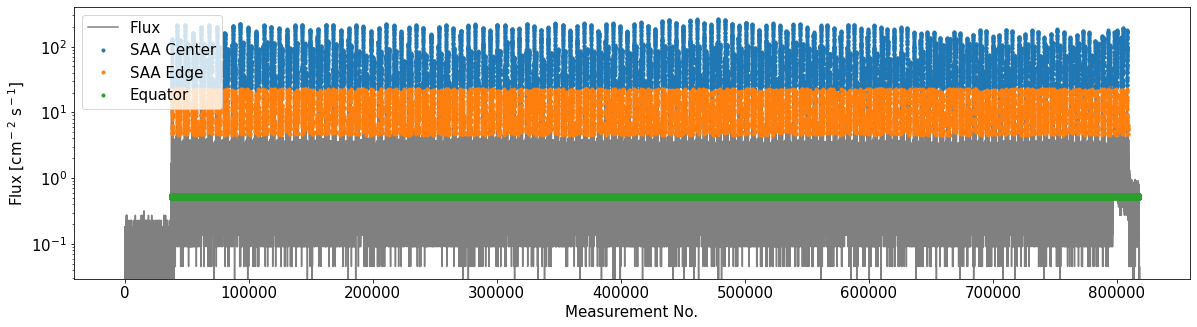

In [6]:
fto = 'iss.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*')#,engine='python' )

rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

# shift one column left for offset 255
rc.loc[rc['257']==255] = rc.loc[rc['257']==255].shift(-1,axis=1)

rc['sum'] = rc.loc[:,'6':'253'].sum(axis=1)

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rc['sum']/11/2, c='gray', label='Flux')
plt.yscale('log')

ee = 10
per = 6300
e = np.array(range(100))
e[0] = 7020 + 4 * 6300 + 360
e[1] = 450
e[2] = 550
e[3] = e[0] + per
e[4] = e[1] + per
e[5] = e[2] + per
e[6] = e[3] + per
e[7] = e[4] + per
e[8] = e[5] + per

#for i in range(10):
#    rc[e[0] + i * per:e[0] + i * per +100]['sum'].plot(c='red')
plt.plot(rc.loc[(rc['sum']>500) & (rc['sum']<10000)]['sum']/11/2, marker='.', linestyle='', label='SAA Center')
plt.plot(rc.loc[(rc['sum']>100) & (rc['sum']<500)]['sum']/11/2, marker='.', linestyle='', label='SAA Edge')
plt.plot(rc.loc[(rc['sum']>10) & (rc['sum']<13)]['sum']/11/2, marker='.', linestyle='', label='Equator')

plt.legend()

plt.xlabel('Measurement No.')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
#plt.xlim([34500,36000])
#plt.ylim([0,4000])



(array([600000., 602000., 604000., 606000., 608000., 610000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

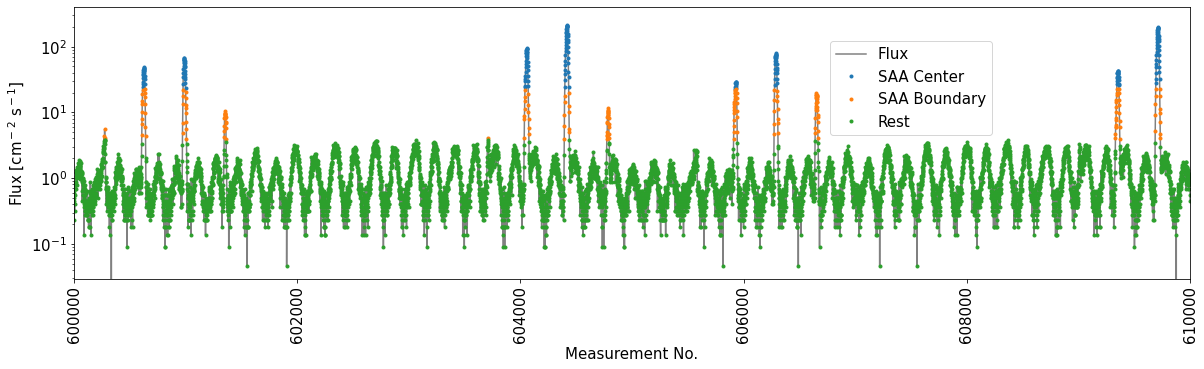

In [2]:
fto = 'iss.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*')#,engine='python' )

rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

# shift one column left for offset 255
rc.loc[rc['257']==255] = rc.loc[rc['257']==255].shift(-1,axis=1)

rc['sum'] = rc.loc[:,'6':'253'].sum(axis=1)

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rc['sum']/11/2, c='gray', label='Flux')
plt.yscale('log')

ee = 10
per = 6300
e = np.array(range(100))
e[0] = 7020 + 4 * 6300 + 360
e[1] = 450
e[2] = 550
e[3] = e[0] + per
e[4] = e[1] + per
e[5] = e[2] + per
e[6] = e[3] + per
e[7] = e[4] + per
e[8] = e[5] + per

#for i in range(10):
#    rc[e[0] + i * per:e[0] + i * per +100]['sum'].plot(c='red')
plt.plot(rc.loc[(rc['sum']>500) & (rc['sum']<10000)]['sum']/11/2, marker='.', linestyle='', label='SAA Center')
plt.plot(rc.loc[(rc['sum']>85) & (rc['sum']<500)]['sum']/11/2, marker='.', linestyle='', label='SAA Boundary')
plt.plot(rc.loc[(rc['sum']>0) & (rc['sum']<85)]['sum']/11/2, marker='.', linestyle='', label='Rest')

plt.legend(bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))

plt.xlabel('Measurement No.')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
#plt.xlim([34500,35700])
plt.xlim([600000,610000])
plt.xticks(rotation=90)
#plt.ylim([0,4000])



(array([37428., 37429., 37430., 37431., 37432., 37433., 37434., 37435.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

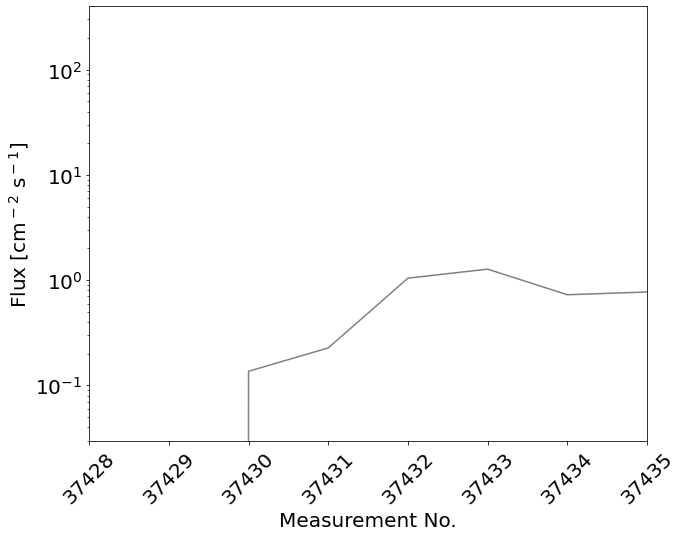

In [160]:
plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})

plt.plot(rc['sum']/11/2, c='gray', label='Flux')
plt.yscale('log')
plt.plot(rc.loc[(rc['sum']>500) & (rc['sum']<10000)]['sum']/11/2, marker='.', linestyle='', label='SAA Inner')
plt.plot(rc.loc[(rc['sum']>80) & (rc['sum']<500)]['sum']/11/2, marker='.', linestyle='', label='SAA Edge')
plt.plot(rc.loc[(rc['sum']>10) & (rc['sum']<13)]['sum']/11/2, marker='.', linestyle='', label='Equator')

#plt.legend()

plt.xlabel('Measurement No.')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
#plt.xlim([43700,45200])
plt.xlim([37428,37435])
#plt.xlim([600000,601500])
plt.xticks(rotation=45)
#plt.ylim([0,4000])

(0.04, 200)

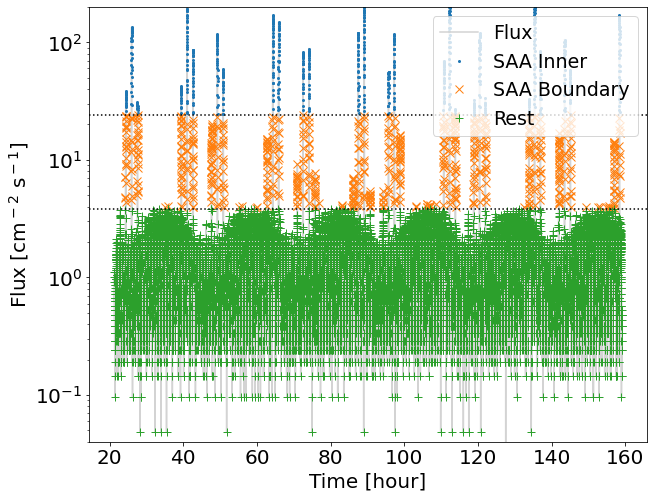

In [4]:
plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})

rcc = rc.iloc[43200:85200].copy()
#rcc['time'] = pd.to_datetime(rcc.index * 11, unit='s')
rcc['time'] = (rcc.index -37431) * 13.3 /60/60
rcc = rcc.loc[rcc['time']<(21.5+133+4.5)]
rcc.set_index('time', inplace=True, drop=False)

plt.plot(rcc['sum']/10.4/2, c='lightgray', label='Flux')
plt.yscale('log')
plt.plot(rcc.loc[(rcc['sum']>500) & (rcc['sum']<10000)]['sum']/10.4/2, ms=4, marker='.', linestyle='', label='SAA Inner')
plt.plot(rcc.loc[(rcc['sum']>80) & (rcc['sum']<500)]['sum']/10.4/2, ms=8, marker='x', linestyle='', label='SAA Boundary')
plt.plot(rcc.loc[(rcc['sum']>0) & (rcc['sum']<80)]['sum']/10.4/2, ms=8, marker='+', linestyle='', label='Rest')

plt.axhline(y = 500/10.4/2, color = 'black', linestyle = ':')
plt.axhline(y = 80/10.4/2, color = 'black', linestyle = ':')
#plt.axhline(y = 13/10.4/2, color = 'black', linestyle = ':')
#plt.axhline(y = 10/10.4/2, color = 'black', linestyle = ':')

plt.legend(fontsize=19)

plt.xlabel('Time [hour]')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
#plt.xlim(21.5,28.5)
#plt.xlim(21.5,21.5+133)
#plt.xlim([600000,601500])
#plt.xticks(rotation=45)
plt.ylim([0.04,200])

In [39]:
#rcc = rc.iloc[43200:800000].copy()
#rcc['time'] = pd.to_datetime(rcc.index * 11, unit='s')
#rcc['time'] = (rcc.index -37431) * 13.3 /60/60
#rcc.set_index('time', inplace=True, drop=False)
flux = rcc.copy()
flux.drop(columns=flux.columns[0:259], inplace=True)
flux.drop(columns=['time'], inplace=True)
flux.rename(columns={"sum": "flux"}, inplace=True)
flux

flux
time           
21.313250  19.0
21.316944  21.0
21.320639  23.0
21.324333  13.0
21.328028  21.0
...         ...
28.683667  40.0
28.687361  43.0
28.691056  48.0
28.694750  40.0
28.698444  36.0

[2000 rows x 1 columns]

In [46]:
#rcc.loc[(rcc['sum']>80) & (rcc['sum']<10000)]['time'].diff()
#rcc.loc[(rcc['sum']>0) & (rcc['sum']<80)]['time'].diff()
print('time of selection in hours')
print(len(rcc.loc[(rcc['sum']>80) & (rcc['sum']<10000)]['time'])* 0.003694)
print(len(rcc.loc[(rcc['sum']>0) & (rcc['sum']<80)]['time'])* 0.003694)

time of selection in hours
5.688759999999999
131.94968


In [41]:
#   flux.to_csv('flux.csv')

## Energy spectrum

811
729
35721


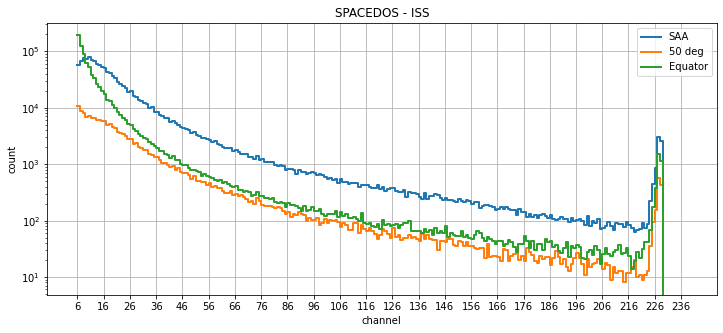

In [25]:
matplotlib.rcParams.update({'font.size': 10})

LOW_ENERGY = 7
#LOW_ENERGY = 5
HIGH_ENERGY = 240

#rca = rc.iloc[43200:800000].copy()
rca = rcc

LENGTH = 10000
rce = rca.loc[(rca['sum']>500) & (rca['sum']<10000)][:LENGTH]
print(len(rce))
#ener1 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
ener1 = rce.iloc[:,LOW_ENERGY:HIGH_ENERGY].sum()
rce = rca.loc[(rca['sum']>80) & (rca['sum']<500)][:LENGTH]
print(len(rce))
#ener2 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
ener2 = rce.iloc[:,LOW_ENERGY:HIGH_ENERGY].sum()
rce = rca.loc[(rca['sum']<80)][:LENGTH]
#rce = rc.loc[(rc['sum']>2.0) & (rc['sum']<13)][:LENGTH]
#rce = rc.loc[(rc['sum']>10) & (rc['sum']<80)][:LENGTH]
print(len(rce))
#ener3 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
ener3 = rce.iloc[:,LOW_ENERGY:HIGH_ENERGY].sum()


plt.figure(figsize=(12,5))
plt.yscale('log')
#plt.xscale('log')

plt.plot(ener1, label='SAA', lw=2, drawstyle='steps-post')
plt.plot(ener2, label='50 deg', lw=2, drawstyle='steps-post')
plt.plot(ener3, label='Equator', lw=2, drawstyle='steps-post')

#plt.ylim([0,12000])
#plt.xlim([0,40])
plt.legend()
plt.title('SPACEDOS - ISS')
plt.xlabel('channel')
plt.ylabel('count')
plt.xticks(range(0,240,10))
#plt.xticks(rotation=90)
plt.grid()

0.1 0.038


/tmp/ipykernel_21791/1421494430.py:37: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', linestyle='-')
/tmp/ipykernel_21791/1421494430.py:38: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='lightgray', linestyle='-')


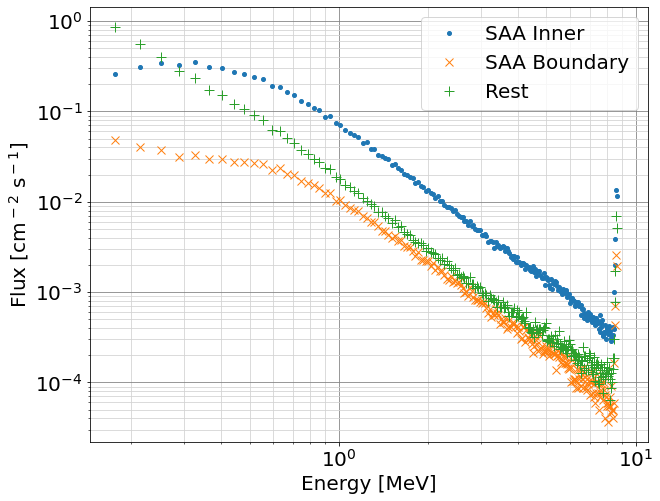

In [10]:
plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})

coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.1

print (coef[0], coef[1])

e = pd.DataFrame()
e['1'] = ener1
e['2'] = ener2
e['3'] = ener3
e['i'] = ener1.index
e['x'] = (e['i'].astype(float)-4) * coef[1] + coef[0]

plt.yscale('log')
plt.xscale('log')

plt.plot(e['x'], e['1']/11/2/LENGTH , label='SAA Inner', ms=8, marker='.', drawstyle='steps-post', linestyle='')
plt.plot(e['x'], e['2']/11/2/LENGTH , label='SAA Boundary', ms=8, marker='x', drawstyle='steps-post', linestyle='')
plt.plot(e['x'], e['3']/11/2/LENGTH , label='Rest', ms=10, marker='+', drawstyle='steps-post', linestyle='')

#plt.plot(e['x'], e['1']/11/2/LENGTH , label='SAA Center', lw=2, drawstyle='steps-post', linestyle='-')
#plt.plot(e['x'], e['2']/11/2/LENGTH , label='SAA Edge', lw=2, drawstyle='steps-post', linestyle='-')
#plt.plot(e['x'], e['3']/11/2/LENGTH , label='Equator', lw=2, drawstyle='steps-post', linestyle='-')

#plt.ylim([0,12000])
#plt.xlim([0,40])
plt.legend()#loc=9)
#plt.title('SPACEDOS - ISS')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
#plt.ylabel(r'Counts [per 12 hours]')
#plt.xticks(rotation=90)
#plt.grid()
plt.grid(b=True, which='major', color='gray', linestyle='-')
plt.grid(b=True, which='minor', color='lightgray', linestyle='-')


Text(0, 0.5, 'Flux [cm$^-$$^2$ s$^-$$^1$]')

<Figure size 1080x576 with 0 Axes>

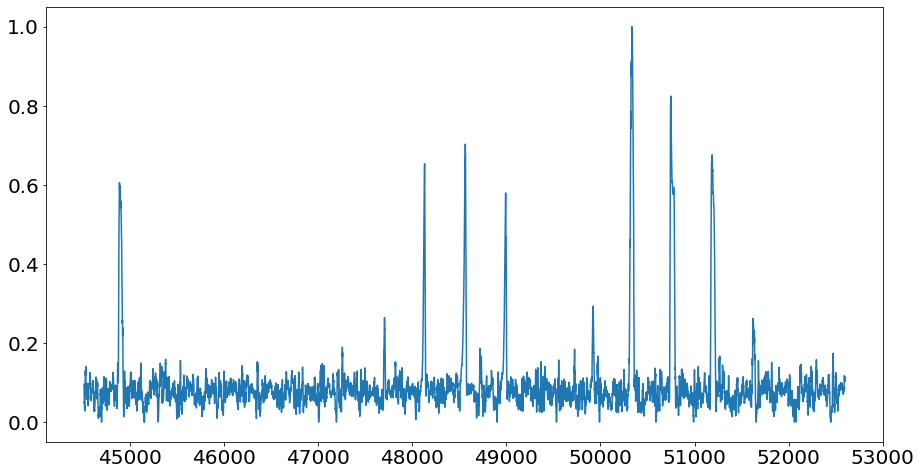

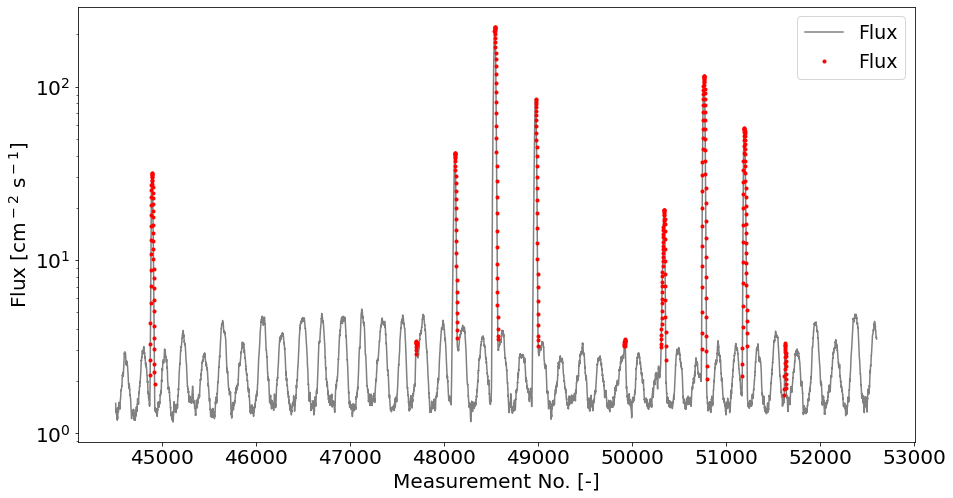

In [602]:
plt.figure(figsize=(15,8))
matplotlib.rcParams.update({'font.size': 20})

#rcc = rc.iloc[43200:55200].copy()
rcc = rc.iloc[44500:52600].copy()

#rcc['time'] = pd.to_datetime(rcc.index * 11, unit='s')

#rcc['time'] = (rcc.index -37431) * 13.3 /60/60
rcc['time'] = (rcc.index)

rcc.set_index('time', inplace=True, drop=False)


rcc['sum'] = rcc.iloc[:,6:240].sum(axis=1)
rcc = rcc.rolling(10).mean()

#rcc['slope'] = np.nan
rcc['sum1'] = rcc.iloc[:,7:15].sum(axis=1)
rcc['sum2'] = rcc.iloc[:,20:26].sum(axis=1)
rcc['ratio'] = rcc['sum2'] / rcc['sum1']

#rcc['slope'] = rcc.apply(lambda row : np.polyfit(range(7,11), row[7:11], 1)[0], axis = 1)
#rcc['slope'] = rcc.iloc[:,7] - rcc.iloc[:,10]
    
plt.figure(figsize=(15,8))
matplotlib.rcParams.update({'font.size': 20})

plt.plot(rcc['ratio'], label='1')
#plt.plot(rcc['sum2'], label='2')


plt.figure(figsize=(15,8))
matplotlib.rcParams.update({'font.size': 20})

plt.plot(rcc['sum']/10.4/2, c='gray', label='Flux')
plt.plot(rcc.loc[(rcc['ratio'])>0.19]['sum']/10.4/2, c='red', marker='.', linestyle='', label='Flux')
#plt.plot(rcc.loc[rcc['sum']>80]['sum']/10.4/2, c='blue', marker='+', linestyle='', label='Flux')
plt.yscale('log')
#plt.plot(rcc.loc[(rcc['sum']>500) & (rcc['sum']<10000)]['sum']/10.4/2, ms=4, marker='.', linestyle='', label='SAA Inner', color='black')
#plt.plot(rcc.loc[(rcc['sum']>80) & (rcc['sum']<500)]['sum']/10.4/2, ms=8, marker='x', linestyle='', label='SAA Boundary', color='black')
#plt.plot(rcc.loc[(rcc['sum']>0) & (rcc['sum']<80)]['sum']/10.4/2, ms=8, marker='+', linestyle='', label='Rest', color='black')

#plt.axhline(y = 500/10.4/2, color = 'black', linestyle = ':')
#plt.axhline(y = 80/10.4/2, color = 'black', linestyle = ':')
#plt.axhline(y = 13/10.4/2, color = 'black', linestyle = ':')
#plt.axhline(y = 10/10.4/2, color = 'black', linestyle = ':')

plt.legend(fontsize=19)

plt.xlabel('Measurement No. [-]')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
#plt.xlim(21.5,28.5)
#plt.xlim([600000,601500])
#plt.xticks(rotation=45)
#plt.ylim([0.04,200])

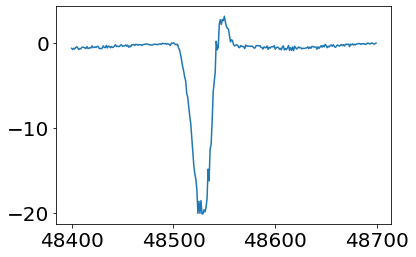

In [511]:
rcc.iloc[:,7:20]

for index, row in rcc.iterrows():
    a,b = np.polyfit(range(7,20), row[7:20], 1)
    row['sum1'] = a

plt.plot(rcc['sum1'])

In [538]:
  
rcc['slope'] = rcc.apply(lambda row : np.polyfit(range(7,20), row[7:20], 1)[0], axis = 1)
  
#np.polyfit(range(7,20), row[7:20], 1)[0]


0
10
10


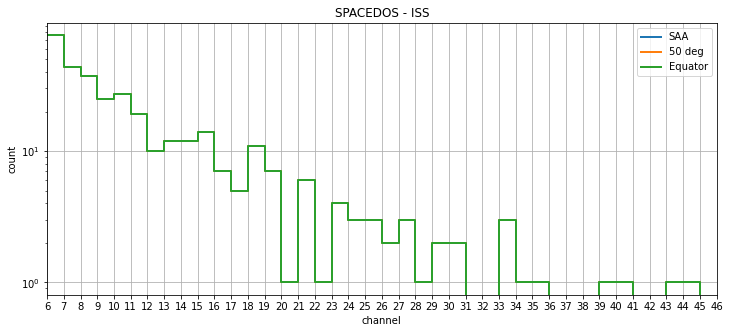

In [560]:
matplotlib.rcParams.update({'font.size': 10})

LOW_ENERGY = 7
HIGH_ENERGY = 240

#rca = rc.iloc[48520:48540].copy()
#rca = rc.iloc[48540:48560].copy()
rca = rc.iloc[48575:48585].copy()

LENGTH = 10000
rce = rca.loc[(rca['sum']>500) & (rca['sum']<10000)][:LENGTH]
print(len(rce))
#ener1 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
ener1 = rce.iloc[:,LOW_ENERGY:HIGH_ENERGY].sum()
rce = rca.loc[(rca['sum']>10) & (rca['sum']<10000)][:LENGTH]
print(len(rce))
#ener2 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
ener2 = rce.iloc[:,LOW_ENERGY:HIGH_ENERGY].sum()
rce = rca.loc[(rca['sum']<80)][:LENGTH]
#rce = rc.loc[(rc['sum']>2.0) & (rc['sum']<13)][:LENGTH]
#rce = rc.loc[(rc['sum']>10) & (rc['sum']<80)][:LENGTH]
print(len(rce))
#ener3 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
ener3 = rce.iloc[:,LOW_ENERGY:HIGH_ENERGY].sum()


plt.figure(figsize=(12,5))
plt.yscale('log')
#plt.xscale('log')

plt.plot(ener1, label='SAA', lw=2, drawstyle='steps-post')
plt.plot(ener2, label='50 deg', lw=2, drawstyle='steps-post')
plt.plot(ener3, label='Equator', lw=2, drawstyle='steps-post')

#plt.ylim([0,12000])
plt.xlim(0,40)
plt.legend()
plt.title('SPACEDOS - ISS')
plt.xlabel('channel')
plt.ylabel('count')
#plt.xticks(range(0,240,10))
#plt.xticks(rotation=90)
plt.grid()

## Spectrum with plotly

0.1 0.038


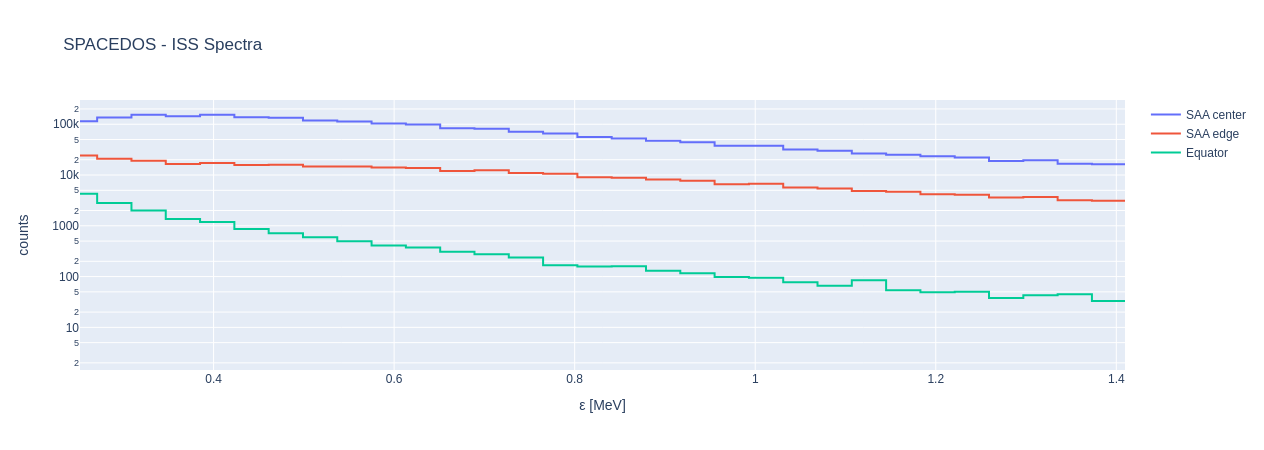

In [353]:
import plotly.graph_objs as go

# Solving following system of linear equations
# 237a + b = 6.12
# 215a + b = 5.49
#tl = 0.5
#l = np.array([[6, 1],[140,1]])
#r = np.array([0.15, 5.14])
#coef = np.linalg.solve(l,r)
#coef[1] = 0.04
#coef[0] = 0.01
print (coef[0], coef[1])

e = pd.DataFrame()
e['1'] = ener1
e['2'] = ener2
e['3'] = ener3
e['index'] = ener1.index
e['x'] = (e['index'].astype(float)-2) * coef[1] + coef[0]

data = [
    go.Scatter(
        x=e['x'],
        y=e['1'],
        name='SAA center',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['2'],
        name='SAA edge',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=e['x'],
        y=e['3'],
        name='Equator',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    ]
        
layout = go.Layout(
    title='SPACEDOS - ISS Spectra',
    yaxis=dict(
        title='counts',
        type='log',
        #range = [0,40000]
    ),
    xaxis=dict(
        title='ε [MeV]',
    ),
)

fig = go.Figure(data=data, layout=layout)
fig.show()


<ipython-input-23-16b264121307>:27: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  rcc = rcc['2019-09-25 13:57':]


Text(0, 0.5, 'Flux [counts per 10 s]')

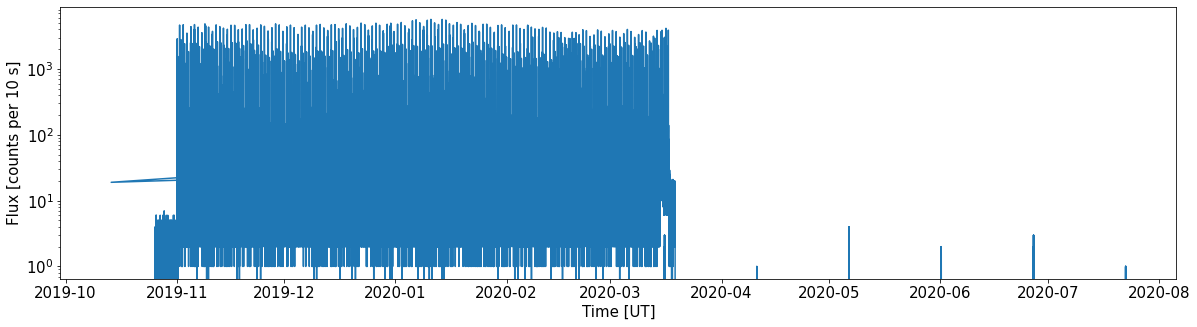

In [23]:
fto = 'iss.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*')#, nrows=1000)#,engine='python' )

rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

rcc = rc.copy()

rcc.loc[rcc['257']==255] = rcc.loc[rcc['257']==255].shift(-1,axis=1)
rcc['tim'] = rc['2']

overflow = 0

# count time overflow and sustract time of launch
def helper(a):
    global overflow
    if a < 20:
        overflow += 1
    return a + overflow * 2**21
rcc['timtim'] = rcc['tim'].apply(helper) - 619590#3590147

rcc['time'] = pd.to_datetime(pd.to_datetime('2019-09-25 13:57:42.701') + pd.to_timedelta(rcc['timtim']*1.06, unit='s'))

rcc = rcc.set_index(['time'])
#rcc = rcc.sort_index()
rcc = rcc['2019-09-25 13:57':]

rcc['sum'] = rcc.loc[:,'6':'253'].sum(axis=1)

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rcc['sum'])
#rcc.ix[:,'sum'].plot(c='gray')
plt.yscale('log')
plt.xlabel('Time [UT]')
plt.ylabel('Flux [counts per 10 s]')


Text(0, 0.5, 'Flux [counts per 10 s]')

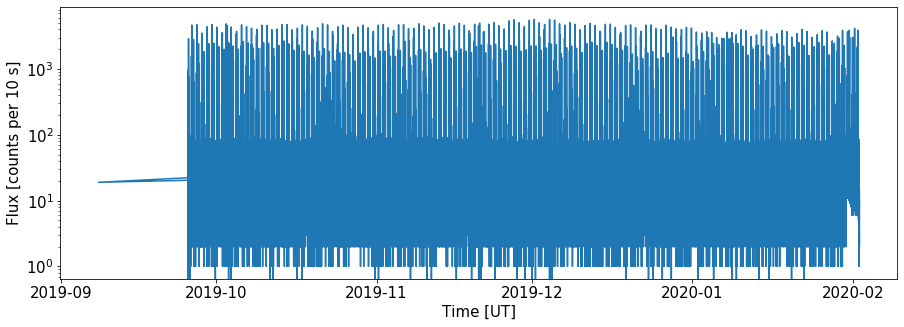

In [85]:
%matplotlib inline

fto = 'iss2.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*')#, nrows=10000)#,engine='python' )

rcc = rc

rcc['time'] = pd.to_datetime(pd.to_datetime('2019-09-25 13:57:42.701') + pd.to_timedelta(rcc['timtim']*1, unit='s'))
rcc = rcc.set_index(['time'])
#rcc = rcc.sort_index()

rcc['sum'] = rcc.loc[:,'6':'253'].sum(axis=1)
#rcc['sum'] = rcc['sum'].rolling(60).mean()

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rcc['sum'])
#rcc.ix[:,'sum'].plot(c='gray')
plt.yscale('log')
plt.xlabel('Time [UT]')
plt.ylabel('Flux [counts per 10 s]')


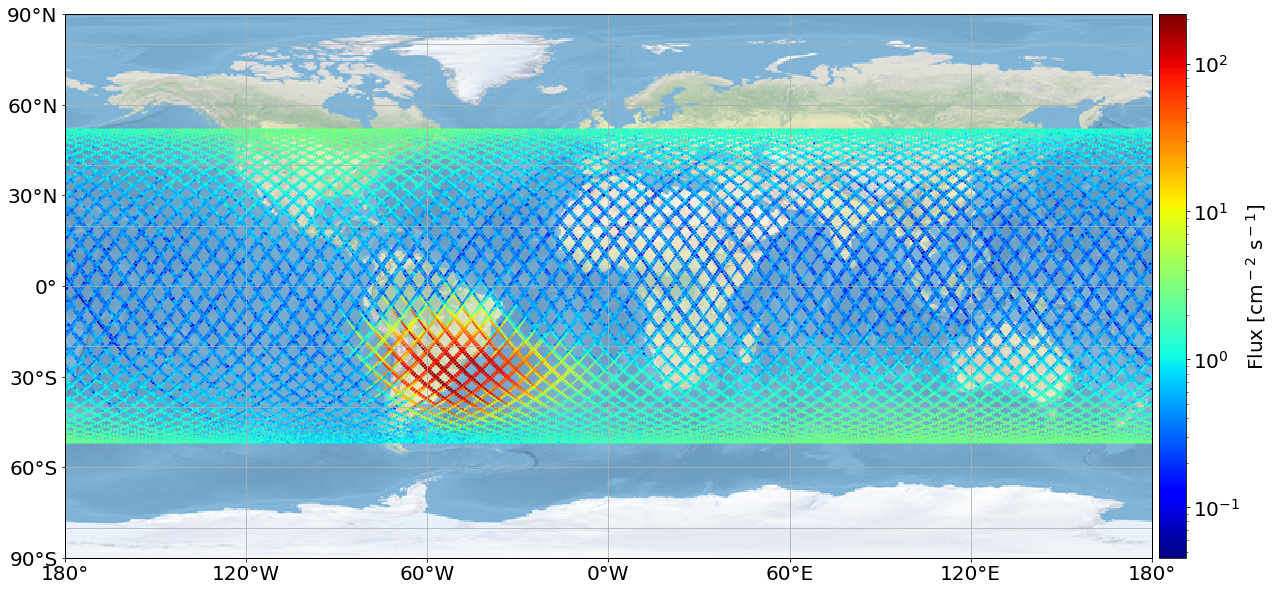

In [125]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs

fto = 'iss2.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*', nrows=50000)
rc.reset_index(drop=True, inplace=True)

#rc['time'] = pd.to_datetime(pd.to_datetime('2019-09-25 13:57:42.701') + pd.to_timedelta(rc['timtim']*1.03256, unit='s'))
#rc['time'] = pd.to_datetime(pd.to_datetime('2019-09-25 13:57:40') + pd.to_timedelta(rc['timtim']*1.0048, unit='s'))
rc['time'] = pd.to_datetime(pd.to_datetime('2019-09-25 13:57:40') + pd.to_timedelta(rc['timtim']*1.0048, unit='s'))
rc = rc.set_index(['time'])

rc.index = rc.index.tz_localize(timezone.utc)
rc = rc.sort_index()


rc['sum'] = rc.loc[:,'6':'253'].sum(axis=1)

ts = load.timescale(builtin=True)

TLE = """ISS (ZARYA) 
1 25544U 98067A   19268.97576939  .00000347  00000-0  14092-4 0  9995
2 25544  51.6418 221.4194 0007471  85.4554  23.2885 15.50107914190898
"""
name, L1, L2 = TLE.splitlines()

sat = EarthSatellite(L1, L2)

#minutes = np.arange(0, 180, 1) # about two orbits
#times   = ts.utc(2019, 9, 25, 13, minutes)
#fr = pd.to_datetime('2019-09-30').tz_localize('UTC')
#to = pd.to_datetime('2019-11-30').tz_localize('UTC')
#times = ts.utc(rc[fr:to].index)
times = ts.utc(rc.index)


geocentric = sat.at(times)
subsat = geocentric.subpoint()

#fig = plt.figure(figsize=(26, 10))
fig = plt.figure(figsize=(26, 10))
matplotlib.rcParams.update({'font.size': 20})

#plt.tight_layout()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertCylindrical())
ax.gridlines(draw_labels=False)

ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.stock_img()

#sc = plt.scatter(subsat.longitude.degrees, subsat.latitude.degrees, s=6, lw=0, cmap='jet', c=rc[fr:to]['sum']/11/2, norm=matplotlib.colors.LogNorm())
sc = plt.scatter(subsat.longitude.degrees, subsat.latitude.degrees, s=6, lw=0, cmap='jet', c=rc['sum']/11/2, norm=matplotlib.colors.LogNorm())
#plt.scatter(subsat.longitude.degrees, subsat.latitude.degrees, s=10, lw=0, cmap='gist_rainbow', c=rc[fr:to]['sum'])
#plt.tricontour(subsat.longitude.degrees, subsat.latitude.degrees, rc[fr:to]['sum'], 500, linewidths=20, cmap='jet')
#cb = plt.colorbar(sc)
cb = plt.colorbar(sc,fraction=0.024, pad=0.005)

cb.set_label(r'Flux [cm$^-$$^2$ s$^-$$^1$]')

Text(0, 0.5, 'Flux [counts per 10 s]')

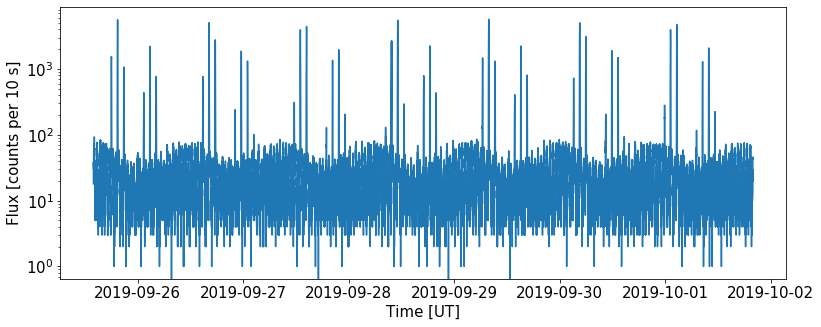

In [86]:
%matplotlib inline

fto = 'iss.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*', nrows=40000)

rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

rc.loc[rc['257']==255] = rc.loc[rc['257']==255].shift(-1,axis=1)

rc['time'] = pd.to_datetime(pd.to_datetime('2019-09-25 13:57:42.701') + pd.to_timedelta(rc.index*13.5, unit='s'))
rc = rc.set_index(['time'])
rc.index = rc.index.tz_localize(timezone.utc)

rc['sum'] = rc.loc[:,'6':'253'].sum(axis=1)

plt.figure(figsize=(13,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rc['sum'])
#rcc.ix[:,'sum'].plot(c='gray')
plt.yscale('log')
plt.xlabel('Time [UT]')
plt.ylabel('Flux [counts per 10 s]')


In [204]:
e['x'] = (e['index'].astype(float)+5) * coef[0] + coef[1]
e

1        2        3 index      x
5    124035.0  46360.0  28618.0     5  -1.96
6    129686.0  22555.0   4365.0     6  -2.16
7    153263.0  19211.0   2902.0     7  -2.36
8    170698.0  17338.0   2058.0     8  -2.56
9    158804.0  14843.0   1401.0     9  -2.76
..        ...      ...      ...   ...    ...
234       0.0      0.0      0.0   234 -47.76
235       0.0      0.0      0.0   235 -47.96
236       0.0      0.0      0.0   236 -48.16
237       0.0      0.0      0.0   237 -48.36
238       0.0      0.0      0.0   238 -48.56

[234 rows x 5 columns]

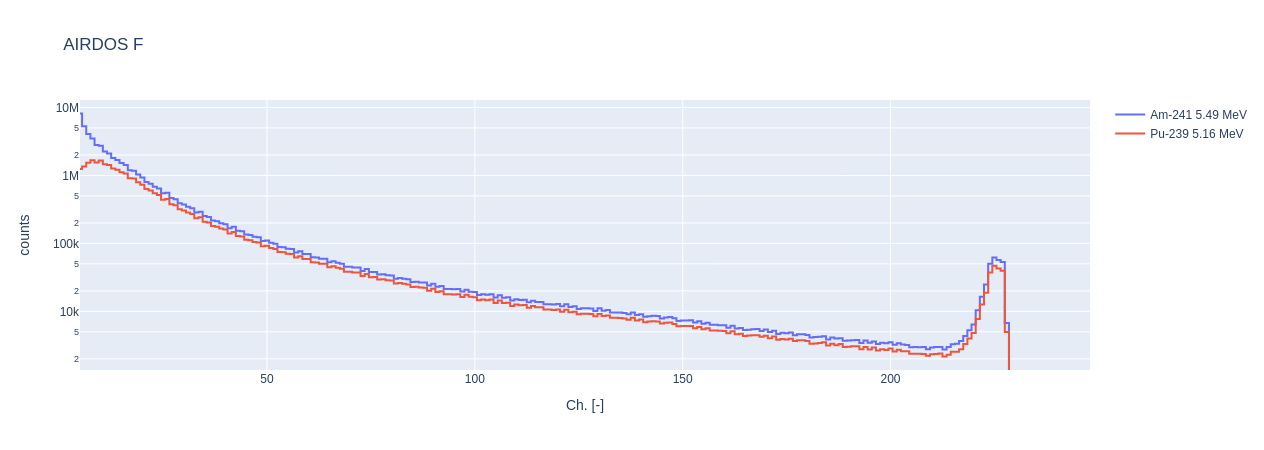

In [13]:
#import plotly.plotly as py
import plotly.graph_objs as go

#plt.plot(ener1, label='Am-241 5.49 MeV (85 %) / 5.44 MeV (13 %)', drawstyle='steps-pre')
#plt.plot(ener2, label='Pu-239 5.16 MeV (73 %) / 5.14 (15 %) / 5.11 (12 %)', drawstyle='steps-pre')

data = [
    go.Scatter(
        x=ener1.index,
        y=ener1,
        name='Am-241 5.49 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    go.Scatter(
        x=ener1.index,
        y=ener2,
        name='Pu-239 5.16 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    ),    
    ]

layout = go.Layout(
    title='AIRDOS F',
    yaxis=dict(
        title='counts',
        type='log',
        #range = [0,40000]
    ),
    xaxis=dict(
        title='Ch. [-]',
    )
)

fig = go.Figure(data=data, layout=layout)
fig
#plotly.offline.iplot(fig, filename='ble')

# Cumulative dose

0.105 0.038


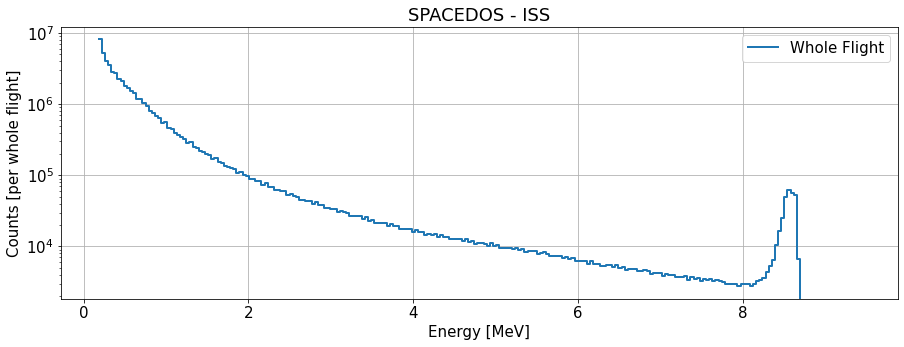

In [603]:
fto = 'iss.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*')#,engine='python' )

rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')
rcc = rc.copy()

# shift one column left for offset 255
rc.loc[rc['257']==255] = rc.loc[rc['257']==255].shift(-1,axis=1)

rc['sum'] = rc.iloc[:,7:240].sum(axis=1)

plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

#LOW_ENERGY = 6
#HIGH_ENERGY = 240
#CH = 3

LOW_ENERGY = 6
HIGH_ENERGY = 250
CH = 3

rc.iloc[:,LOW_ENERGY] = rc.iloc[:,LOW_ENERGY] - 13 # subtracting noise from the first channel

ener1 = rc.sum()[LOW_ENERGY:HIGH_ENERGY]

coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.105

print (coef[0], coef[1])

e = pd.DataFrame()
e['1'] = ener1
e['i'] = ener1.index
e['x'] = (e['i'].astype(float)-CH) * coef[1] + coef[0]

plt.yscale('log')

plt.plot(e['x'], e['1'], label='Whole Flight', lw=2, drawstyle='steps-post')

plt.legend()
plt.title('SPACEDOS - ISS')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts [per whole flight]')
#plt.xticks(rotation=90)
plt.grid()

           1  i      x      deposit
5  8162767.0  5  0.181  1477460.827
6  5280348.0  6  0.219  1156396.212
7  4079224.0  7  0.257  1048360.568
8  3507702.0  8  0.295  1034772.090
9  2811896.0  9  0.333   936361.368


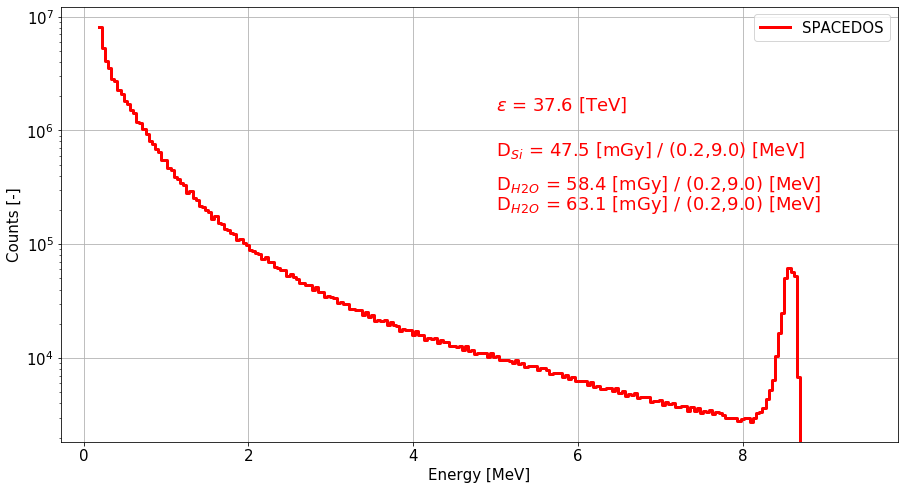

In [356]:
FROM_ENERGY = 0.2
TO_ENERGY = 9.0

e['deposit'] = e['1'] * e['x']
depener = e.loc[(e['x']>=FROM_ENERGY)&(e['x']<=TO_ENERGY),'deposit'].sum() # MeV

#print(xx.iloc[10:12,5:8])

dose = 1e6 * (1.602e-19 * depener * 1e6) / 0.1398e-3 

# size of the chip (20 mm · 10 mm), 
# the thickness of the depletion layer (0.3 mm), 
# and the density of silicon (2.33 g cm^3)
# = 0.1398e-3 kg
# Meier DLR: 0.16597 g
#dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/10.4) * 3600 # in uGy/h
#ambient dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/10.4) * 3600 * 2.71 # in uSv/h

plt.figure(figsize=(15,8))
plt.tight_layout()
plt.yscale('log')

plt.plot(e['x'],e['1'], c='r', lw=3, drawstyle='steps-post', label='SPACEDOS')

plt.text(5, 1.5e6, r'$\epsilon$ = ' + str(round(depener/1e6,1)) + ' [TeV]', fontsize=18, color='r')
plt.text(5, 6e5, r'D$_S$$_i$ = ' + str(round(dose*1.1/1e3,1)) + r' [mGy] / (' + str(FROM_ENERGY) + ',' + str(TO_ENERGY) + ') [MeV]', fontsize=18, color='r')
plt.text(5, 3e5, r'D$_H$$_2$$_O$ = ' + str(round(dose*1.1*1.23/1e3,1)) + r' [mGy] / (' + str(FROM_ENERGY) + ',' + str(TO_ENERGY) + ') [MeV]', fontsize=18, color='r')
plt.text(5, 2e5, r'D$_H$$_2$$_O$ = ' + str(round(dose*1.1*1.33/1e3,1)) + r' [mGy] / (' + str(FROM_ENERGY) + ',' + str(TO_ENERGY) + ') [MeV]', fontsize=18, color='r')
#plt.text(5, 4e5, r'H*(10) = ' + str(round(dose*1.1*1.05*2.45,1)) + r' [$\mu$Gy] / (' + str(FROM_ENERGY) + ',' + str(TO_ENERGY) + ') [MeV]', fontsize=18, color='r')

plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
plt.grid()

print(e[:5])

In [50]:
#rc.iloc[:,LOW_ENERGY:HIGH_ENERGY]
rc.iloc[:,:HIGH_ENERGY]
#len(rc)
#rc

FROM_ENERGY = 0.18
TO_ENERGY = 8.0

a = e.loc[(e['x']>=FROM_ENERGY)&(e['x']<=TO_ENERGY),'1'].sum()
b = e.loc[(e['x']>=FROM_ENERGY)&(e['x']<=TO_ENERGY+1),'1'].sum()
print(a)
print(b)
over = (b-a)*9

print(round((1e6 * (1.602e-19 * over * 1e6) / 0.1398e-3)*1.1/1e3,1) )
e[:5]

e.to_csv('iss_dep_ener.csv')

54439800.0
54758822.0
3.6


         10         9       8        7             6             5
-0.0488 x  + 8.409 x - 288 x + 4575 x - 4.101e+04 x + 2.212e+05 x
              4             3             2
 - 7.164e+05 x + 1.273e+06 x - 7.866e+05 x - 9.536e+05 x + 1.55e+06


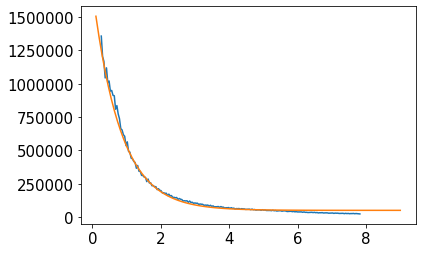

In [161]:
pol = numpy.polyfit((e[:200]['x']),(e[:200]['deposit']),10)
p = np.poly1d(pol)
print(p)
xp = np.linspace(0.1, 9, 100)

def func(x):
    return 49953.72 + 1647381*numpy.exp(-1.234769*x)

plt.plot(e[0:200]['x'],e[0:200]['deposit'])
plt.plot((xp),(func((xp))))
#print(xp,func(xp))

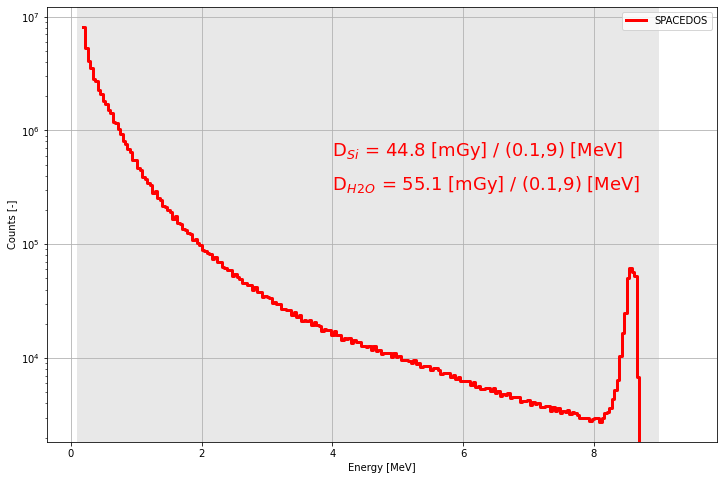

In [605]:
FROM_ENERGY = 0.1
TO_ENERGY = 9

e['deposit'] = e['1'] * e['x']
depener = e.loc[(e['x']>=FROM_ENERGY)&(e['x']<=TO_ENERGY),'deposit'].sum() # MeV


#print(xx.iloc[10:12,5:8])

dose = 1e6 * (1.602e-19 * depener * 1e6) / 0.1398e-3 

# size of the chip (20 mm · 10 mm), 
# the thickness of the depletion layer (0.3 mm), 
# and the density of silicon (2.33 g cm^3)
# = 0.1398e-3 kg
# Meier DLR: 0.16597 g
#dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/10.4) * 3600 # in uGy/h
#ambient dose = ((1e6 * (1.602e-19 * depener * 1e6)/0.1398e-3)/10.4) * 3600 * 2.71 # in uSv/h

plt.figure(figsize=(12,8))
plt.tight_layout()
plt.yscale('log')

plt.plot(e['x'],e['1'], c='r', lw=3, drawstyle='steps-post', label='SPACEDOS')

DEADTIME = 1.

#plt.text(5, 1.5e6, r'$\epsilon$ = ' + str(round(depener/1e6,1)) + ' [TeV]', fontsize=18, color='r')
#plt.text(4, 6e5, r'D$_S$$_i$ = ' + str(round(dose*1.1/1e3,1)) + r' [mGy] / (' + str(FROM_ENERGY) + ',' + str(TO_ENERGY) + ') [MeV]', fontsize=18, color='r')
#plt.text(4, 3e5, r'D$_H$$_2$$_O$ = ' + str(round(dose*1.1*1.23/1e3,1)) + r' [mGy] / (' + str(FROM_ENERGY) + ',' + str(TO_ENERGY) + ') [MeV]', fontsize=18, color='r')
plt.text(4, 6e5, r'D$_S$$_i$ = ' + str(round(dose*DEADTIME/1e3,1)) + r' [mGy] / (' + str(FROM_ENERGY) + ',' + str(TO_ENERGY) + ') [MeV]', fontsize=18, color='r')
plt.text(4, 3e5, r'D$_H$$_2$$_O$ = ' + str(round(dose*DEADTIME*1.23/1e3,1)) + r' [mGy] / (' + str(FROM_ENERGY) + ',' + str(TO_ENERGY) + ') [MeV]', fontsize=18, color='r')

plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
plt.grid()
plt.axvspan(FROM_ENERGY,TO_ENERGY, facecolor='lightgrey', alpha=0.5)


28723
759618


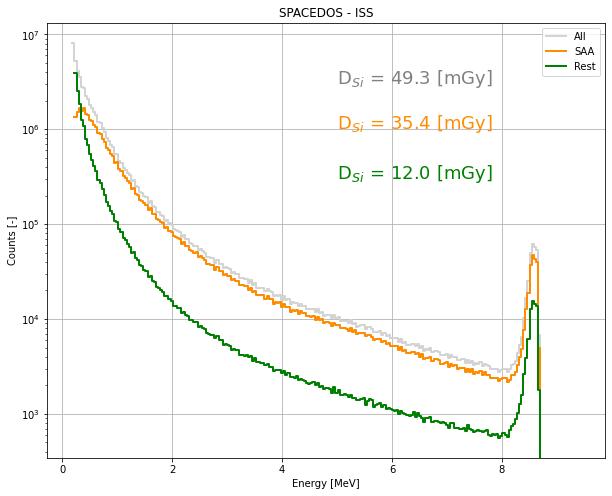

In [606]:
matplotlib.rcParams.update({'font.size': 10})

LOW_ENERGY = 7
HIGH_ENERGY = 240

LENGTH = 1580
#rce = rc.loc[(rc['sum']>100) & (rc['sum']<100000)][:LENGTH]
rce = rc.loc[(rc['sum']>100)]
print(len(rce))
ener2 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]
rce = rc.loc[(rc['sum']>1) & (rc['sum']<=100)]
print(len(rce))
ener3 = rce.sum()[LOW_ENERGY:HIGH_ENERGY]

plt.figure(figsize=(10,8))
plt.yscale('log')

#plt.plot(ener1, label='SAA', lw=2, drawstyle='steps-post')
#plt.plot(ener2, label='50 deg', lw=2, drawstyle='steps-post')
#plt.plot(ener3, label='Equator', lw=2, drawstyle='steps-post')

#e = pd.DataFrame()
e['2'] = ener2
e['3'] = ener3
#e['i'] = ener1.index
#e['x'] = (e['i'].astype(float)-2) * coef[1] + coef[0]
#e['deposit'] = e['1'] * e['x']
#depener = e.loc[(e['x']>=FROM_ENERGY)&(e['x']<=TO_ENERGY),'deposit'].sum() # MeV

#print(xx.iloc[10:12,5:8])
e['deposit1'] = e['1'] * e['x']
depener1 = e.loc[(e['x']>=FROM_ENERGY)&(e['x']<=TO_ENERGY),'deposit1'].sum() # MeV
dose1 = 1e6 * (1.602e-19 * depener1 * 1e6) / 0.1398e-3 

e['x2'] = (e['2'].astype(float)-CH) * coef[1] + coef[0]
e['deposit2'] = e['2'] * e['x']
depener2 = e.loc[(e['x']>=FROM_ENERGY)&(e['x']<=TO_ENERGY),'deposit2'].sum() # MeV
dose2 = 1e6 * (1.602e-19 * depener2 * 1e6) / 0.1398e-3 

e['x3'] = (e['3'].astype(float)-CH) * coef[1] + coef[0]
e['deposit3'] = e['3'] * e['x']
depener3 = e.loc[(e['x']>=FROM_ENERGY)&(e['x']<=TO_ENERGY),'deposit3'].sum() # MeV
dose3 = 1e6 * (1.602e-19 * depener3 * 1e6) / 0.1398e-3 

plt.plot(e['x'], e['1'] , label='All', lw=2, drawstyle='steps-post', color='lightgray')
#plt.plot(e['x'], e['2'] , label='50 deg', lw=2, drawstyle='steps-post')
plt.plot(e['x'], e['2'] , label='SAA', lw=2, drawstyle='steps-post', color='darkorange')
plt.plot(e['x'], e['3'] , label='Rest', lw=2, drawstyle='steps-post', color='green')
#plt.plot(e['x'], e['2']+e['3'] , label='xx', lw=2, drawstyle='steps-post')

#dose2 = e['2'].sum()
#dose3 = e['3'].sum()

'''
plt.text(2, 1e5, r'$\epsilon$ = ' + str(round(depener1/1e6,4)) + ' [TeV]', fontsize=18, color='r')
plt.text(2, 1e4, r'$\epsilon$ = ' + str(round(depener2/1e6,4)) + ' [TeV]', fontsize=18, color='r')
plt.text(2, 1e3, r'$\epsilon$ = ' + str(round(depener3/1e6,4)) + ' [TeV]', fontsize=18, color='r')
'''

plt.text(5, 3e6, r'D$_S$$_i$ = ' + str(round(dose1*1.1/1e3,1)) + r' [mGy]', fontsize=18, color='gray')
plt.text(5, 1e6, r'D$_S$$_i$ = ' + str(round(dose2*1.1/1e3,1)) + r' [mGy]', fontsize=18, color='darkorange')
plt.text(5, 3e5, r'D$_S$$_i$ = ' + str(round(dose3*1.1/1e3,1)) + r' [mGy]', fontsize=18, color='green')

#plt.ylim([0,12000])
#plt.xlim([0,40])
plt.legend()
plt.title('SPACEDOS - ISS')
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
#plt.xticks(range(0,240,10))
#plt.xticks(rotation=90)
plt.grid()

In [214]:
e

1        2       3    i      x
6    114757.0  23495.0  4260.0    6  0.176
7    135766.0  19538.0  2804.0    7  0.214
8    153010.0  17752.0  1997.0    8  0.252
9    143694.0  15222.0  1369.0    9  0.290
10   154608.0  15576.0  1186.0   10  0.328
..        ...      ...     ...  ...    ...
234       0.0      0.0     0.0  234  8.840
235       0.0      0.0     0.0  235  8.878
236       0.0      0.0     0.0  236  8.916
237       0.0      0.0     0.0  237  8.954
238       0.0      0.0     0.0  238  8.992

[233 rows x 5 columns]

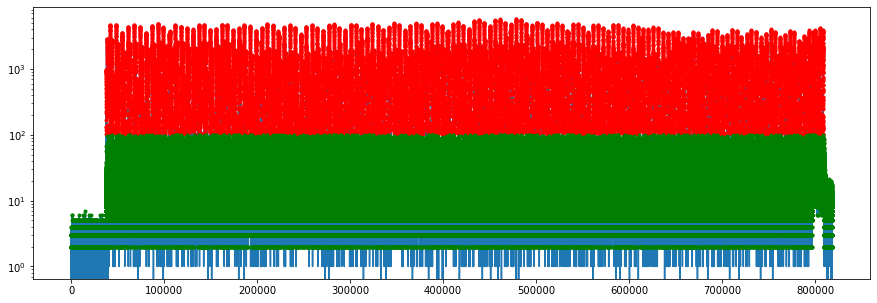

In [18]:
plt.figure(figsize=(15,5))
plt.yscale('log')

plt.plot(rc['sum'])
#plt.plot(rc.iloc[400000:440000]['sum'])
plt.plot(rc.loc[(rc['sum']>100) & (rc['sum']<10000)]['sum'], marker='.', linestyle='', label='SAA Center', color='red')
plt.plot(rc.loc[(rc['sum']>1) & (rc['sum']<100)]['sum'], marker='.', linestyle='', label='SAA Center', color='green')


(array([600000., 605000., 610000., 615000., 620000.]),
 <a list of 5 Text xticklabel objects>)

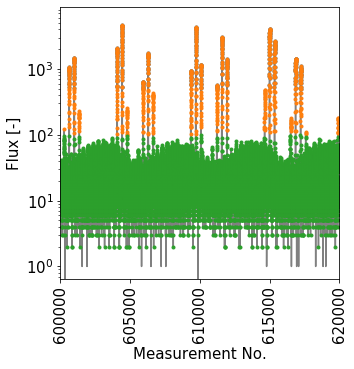

In [160]:
fto = 'iss.csv' #  File to Open
#rc = pd.read_csv(fto, sep=',', header=0, comment='*')#,engine='python' )

rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

# shift one column left for offset 255
rc.loc[rc['257']==255] = rc.loc[rc['257']==255].shift(-1,axis=1)

rc['sum'] = rc.loc[:,'6':'243'].sum(axis=1)

plt.figure(figsize=(5,5))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(rc['sum'], c='gray', label='Flux')
plt.yscale('log')

#for i in range(10):
#    rc[e[0] + i * per:e[0] + i * per +100]['sum'].plot(c='red')
plt.plot(rc.loc[(rc['sum']>500) & (rc['sum']<10000)]['sum'], marker='.', linestyle='', label='SAA Center')
plt.plot(rc.loc[(rc['sum']>100)]['sum'], marker='.', linestyle='', label='SAA Edge')
plt.plot(rc.loc[(rc['sum']>1) & (rc['sum']<100)]['sum'], marker='.', linestyle='', label='Equator')

#plt.legend()

plt.xlabel('Measurement No.')
plt.ylabel(r'Flux [-]')
#plt.xlim([34500,35700])
plt.xlim([600000,620000])
plt.xticks(rotation=90)
#plt.ylim([0,4000])



## Sum of events

In [86]:
FROM_ENERGY = 8.4
TO_ENERGY = 9.0

#rc.iloc[401020:401100,6:7].plot()
#rc.iloc[401020:401100,6:10]
#rc.iloc[:,6] = rc.iloc[:,6] - 15
print(e.loc[(e['x']>=FROM_ENERGY)&(e['x']<=TO_ENERGY),'1'].sum())
e.loc[(e['x']>=FROM_ENERGY)&(e['x']<=TO_ENERGY)]

14093.0


1       2     3    i      x    deposit
221   153.0    31.0   0.0  221  8.422   1288.566
222   147.0    36.0   0.0  222  8.460   1243.620
223   195.0    38.0   1.0  223  8.498   1657.110
224   492.0    86.0   2.0  224  8.536   4199.712
225   983.0   223.0   2.0  225  8.574   8428.242
226  1944.0   426.0  10.0  226  8.612  16741.728
227  7459.0  1730.0  25.0  227  8.650  64520.350
228  2720.0   601.0  15.0  228  8.688  23631.360
229     0.0     0.0   0.0  229  8.726      0.000
230     0.0     0.0   0.0  230  8.764      0.000
231     0.0     0.0   0.0  231  8.802      0.000
232     0.0     0.0   0.0  232  8.840      0.000
233     0.0     0.0   0.0  233  8.878      0.000
234     0.0     0.0   0.0  234  8.916      0.000
235     0.0     0.0   0.0  235  8.954      0.000
236     0.0     0.0   0.0  236  8.992      0.000

# Dose Rate

0.105 0.038


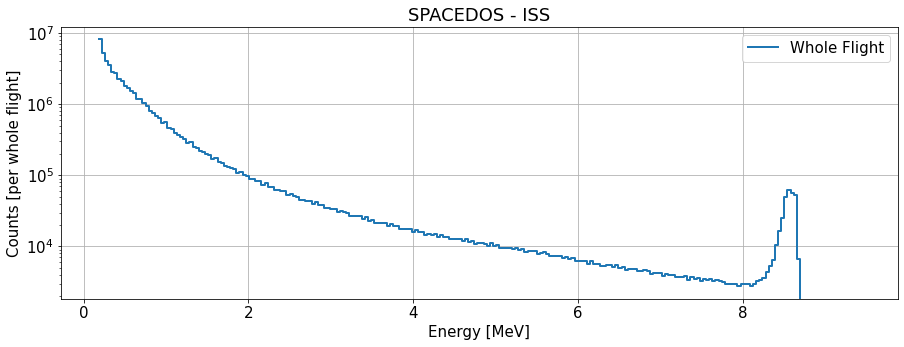

In [7]:
fto = 'iss.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*')#,engine='python' )

rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

# shift one column left for offset 255
rc.loc[rc['257']==255] = rc.loc[rc['257']==255].shift(-1,axis=1)

rc['sum'] = rc.iloc[:,7:240].sum(axis=1)


plt.figure(figsize=(15,5))
matplotlib.rcParams.update({'font.size': 15})

#LOW_ENERGY = 6
#HIGH_ENERGY = 240
#CH = 3

LOW_ENERGY = 6
HIGH_ENERGY = 250
CH = 3

rc.iloc[:,LOW_ENERGY] = rc.iloc[:,LOW_ENERGY] - 13 # subtracting noise from the first channel

ener1 = rc.sum()[LOW_ENERGY:HIGH_ENERGY]

coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.105

print (coef[0], coef[1])

e = pd.DataFrame()
e['1'] = ener1
e['i'] = ener1.index
e['x'] = (e['i'].astype(float)-CH) * coef[1] + coef[0]

plt.yscale('log')

plt.plot(e['x'], e['1'], label='Whole Flight', lw=2, drawstyle='steps-post')

plt.legend()
plt.title('SPACEDOS - ISS')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts [per whole flight]')
#plt.xticks(rotation=90)
plt.grid()

In [9]:
e

1    i      x
5    8162767.0    5  0.181
6    5280348.0    6  0.219
7    4079224.0    7  0.257
8    3507702.0    8  0.295
9    2811896.0    9  0.333
..         ...  ...    ...
244        0.0  244  9.263
245        0.0  245  9.301
246        0.0  246  9.339
247        0.0  247  9.377
248        0.0  248  9.415

[244 rows x 3 columns]

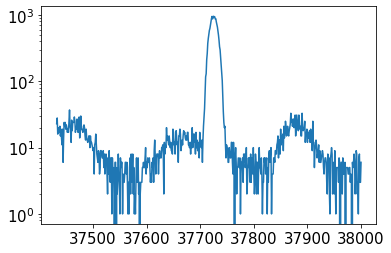

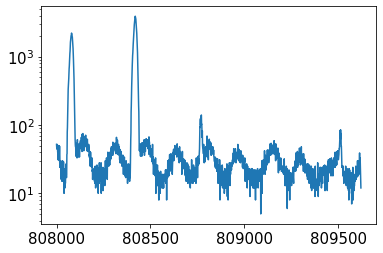

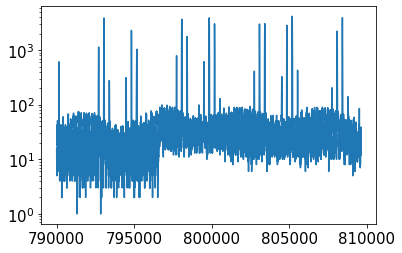

In [437]:
plt.yscale('log')
rc.loc[37432:38000,'sum'].plot()
#rc.loc[37350:38000,'sum'].plot()
plt.show()
plt.yscale('log')
rc.loc[808000:809620,'sum'].plot()
plt.show()
plt.yscale('log')
rc.loc[790000:809620,'sum'].plot()
plt.show()

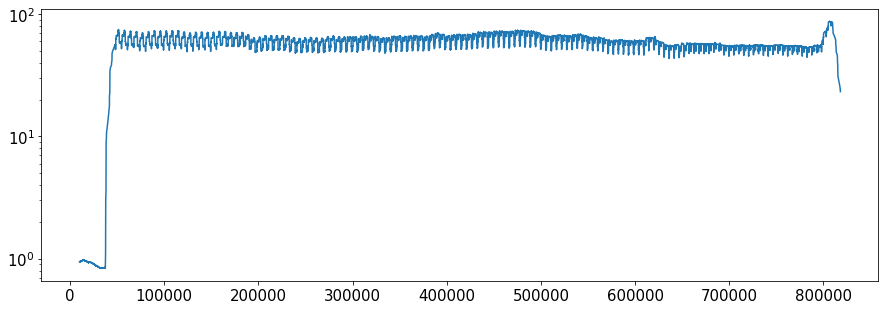

In [48]:
plt.figure(figsize=(15,5))
plt.yscale('log')
#rc.loc[37440:42000,'sum'].rolling(100).mean().plot()
rc.loc[:,'sum'].rolling(10000).mean().plot()
plt.show()


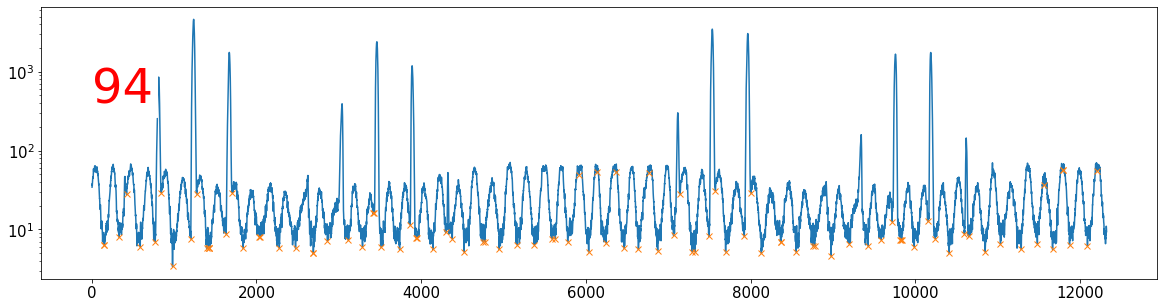

262260.0
783234.4
0.33484228986878


In [195]:
#from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

plt.figure(figsize=(20,5))
plt.yscale('log')

#xx = rc[37432:809620].copy()
#xx = rc[37432:100000].copy()

#x = np.array(rc.loc[37350:809700,'sum'].rolling(100).mean())
#x = np.array(rc.loc[37350:809700,'sum'].rolling(100).mean())
#x = np.array(rc.loc[796500:809620,'sum'].rolling(100).mean())
#x = np.array(rc.loc[610000:800000,'sum'].rolling(50).mean())
#x = np.array(rc.loc[37432:809620,'sum'].rolling(110).mean()) # v kosmu

#x = np.array(rc.loc[37300:809620,'sum'].rolling(110).mean()) # v kosmu

x = np.array(rc.loc[47300:59620,'sum'].rolling(5).mean()) # v kosmu
#x = np.array(rc.loc[37300:80000,'sum'].rolling(100).mean()) # v kosmu

#peaks, _ = find_peaks(x, prominence=60, distance=100)
peaks, _ = find_peaks(-x, prominence=10)
#peaks, _ = find_peaks(x, rel_height=1000, width=200)#, distance=100)
#peaks, _ = find_peaks(-x, distance=130, height=-50)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
#plt.plot(np.zeros_like(x), "--", color="gray")
plt.text(0, 400, str(len(peaks)), fontsize=48, color='r', backgroundcolor='white')
plt.show()
seconds = 60*93*len(peaks)/2
print(seconds)
integration = len(xx)*10.4
print(integration)
print(seconds/integration)

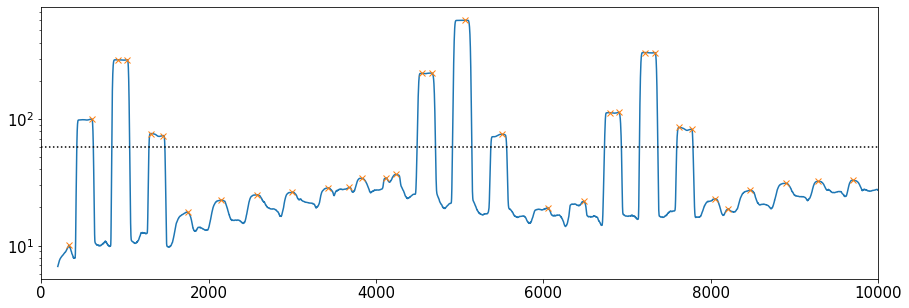

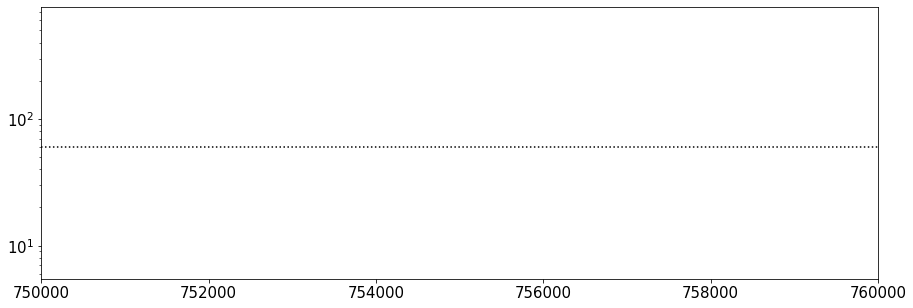

In [264]:
plt.figure(figsize=(15,5))
plt.yscale('log')
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.xlim(0,10000)
plt.axhline(y = 60, color = 'black', linestyle = ':')

plt.figure(figsize=(15,5))
plt.yscale('log')
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.xlim(750000,760000)
plt.axhline(y = 60, color = 'black', linestyle = ':')


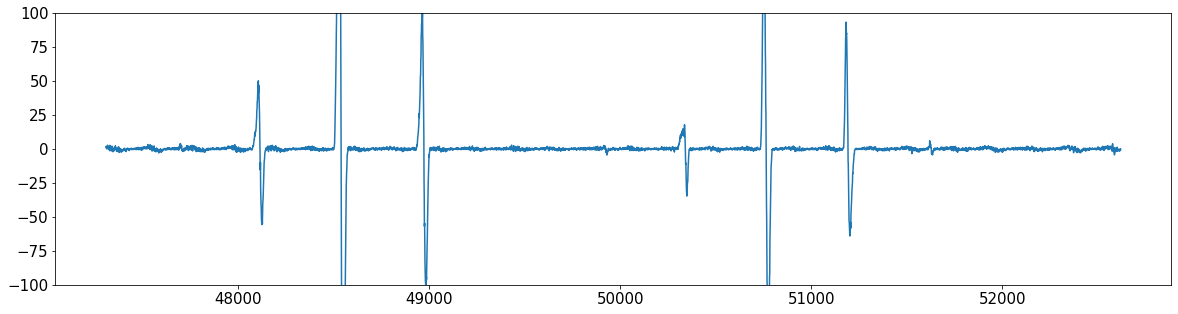

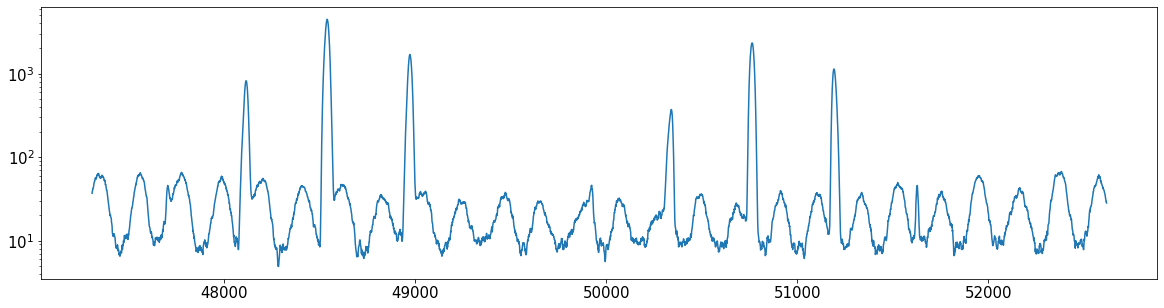

In [44]:
xx = rc[47300:52620].copy()
xx = xx.rolling(10).mean()
xx['diff'] = xx['sum'].diff()

plt.figure(figsize=(20,5))
#plt.yscale('log')
plt.plot(xx['diff'])
plt.ylim(-100,100)

plt.figure(figsize=(20,5))
plt.yscale('log')
plt.plot(xx['sum'])

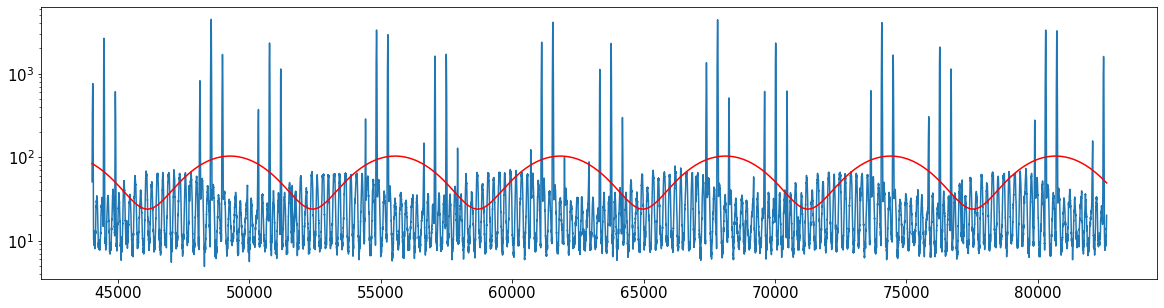

In [213]:
from scipy.optimize import curve_fit
import math

T = 6000
def get_p0(x, y):
    A0 = (max(y[0:T]) - min(y[0:T]))/2
    offset0 = y[0]
    phase0 = 0
    omega0 = 2.*np.pi/T
    return [A0, offset0,omega0, phase0]

def sinusoid(x,A,offset,omega,phase):
    return A*np.sin(omega*x+phase) + offset

xx = rc[44000:82620].copy()
xx = xx.iloc[:,6:]
xx = xx.rolling(10).mean()
xx = xx.dropna()

plt.figure(figsize=(20,5))
plt.yscale('log')
plt.plot(xx['sum'])

param, covariance = curve_fit(sinusoid, xx.index, xx['sum'], p0=get_p0(list(xx.index),list(xx.loc[:,'sum'])))
plt.plot(xx.index, sinusoid(xx.index, *param), color='red')
#plt.xlim(47000,55000)

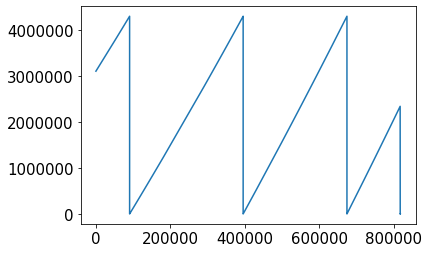

12126899.0


Unnamed: 0        0          1          2        3       4     5    6  \
0          53318.0  13598.0  3101377.0        0.0      NaN  7676.0   8.0  0.0   
1          53319.0  13879.0  3101390.0        0.0      NaN  7444.0   3.0  0.0   
2         250002.0      NaN    53320.0  3101403.0  13844.0  7473.0   5.0  0.0   
3          53321.0  13988.0  3101416.0        0.0      NaN  7368.0   3.0  0.0   
4         250004.0      NaN    53322.0  3101429.0  13738.0  7542.0   4.0  0.0   
...            ...      ...        ...        ...      ...     ...   ...  ...   
818064        18.0  16908.0      314.0        0.0      NaN  4898.0  -5.0  0.0   
818065        19.0  17132.0      330.0        1.0      NaN  4698.0  -8.0  0.0   
818066        20.0  16955.0      347.0        1.0      NaN  4829.0  -5.0  1.0   
818067        21.0  17055.0      363.0        0.0      NaN  4751.0 -10.0  0.0   
818068        22.0  17107.0      380.0        0.0      NaN  4726.0  -6.0  0.0   

          7    8  ...  252  253      254      255    256    257  sum  seconds  \
0       0.0  0.0  ...  0.0  0.0  24703.0     22.0  255.0    1.0  1.0  3101377   
1       0.0  0.0  ...  0.0  0.0  24659.0     17.0  255.0    1.0  1.0  3101390   
2       0.0  0.0  ...  0.0  0.0      0.0  24663.0    0.0  256.0  0.0  3101403   
3       0.0  0.0  ...  0.0  0.0  24627.0     16.0  255.0    0.0  0.0  3101416   
4       2.0  0.0  ...  0.0  0.0      0.0  24699.0    3.0  256.0  3.0  3101429   
...     ...  ...  ...  ...  ...      ...      ...    ...    ...  ...      ...   
818064  0.0  0.0  ...  0.0  0.0  24186.0      8.0  255.0    0.0  0.0      314   
818065  0.0  0.0  ...  0.0  0.0  24164.0      5.0  255.0    0.0  0.0      330   
818066  0.0  0.0  ...  0.0  0.0  24206.0      9.0  255.0    0.0  1.0      347   
818067  0.0  1.0  ...  0.0  0.0  24190.0      4.0  255.0    0.0  1.0      363   
818068  0.0  0.0  ...  0.0  0.0  24160.0      7.0  255.0    0.0  0.0      380   

        row_num  delta  
0             0    NaN  
1             1   13.0  
2             2   13.0  
3             3   13.0  
4             4   13.0  
...         ...    ...  
818064   818064   17.0  
818065   818065   16.0  
818066   818066   17.0  
818067   818067   16.0  
818068   818068   17.0  

[818069 rows x 263 columns]

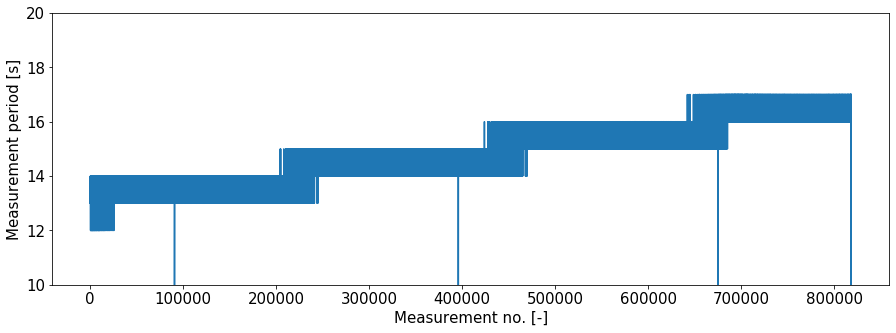

In [273]:
xx =rc
plt.plot(xx['seconds'])
plt.show()
xx['row_num'] = np.arange(len(xx))
xx['delta'] = xx['seconds'].diff()
plt.figure(figsize=(15,5))
plt.plot(xx['delta'])
plt.ylim(10,20)
#plt.xlim(420000,450000)
plt.xlabel('Measurement no. [-]')
plt.ylabel('Measurement period [s]')
print(xx.loc[xx['delta']>0,'delta'].sum())
xx

772188


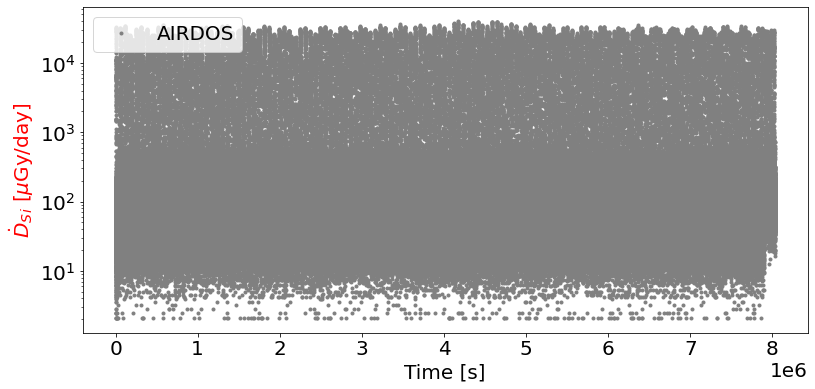

772188


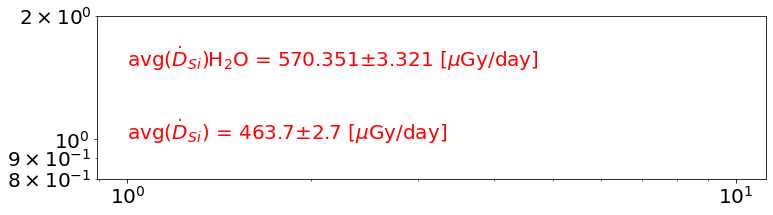

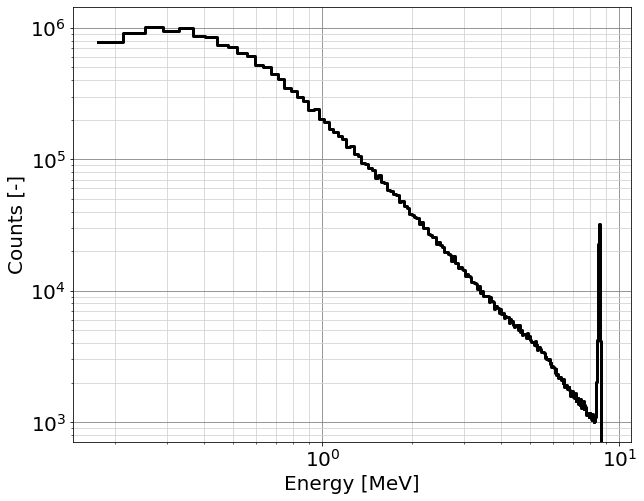

In [6]:
rc['seconds'] = rcc['2']
xx = rc[37432:809620].copy()

#xx = xx.loc[(xx['sum']>100) & (xx['sum']<10000)]
#xx = xx.loc[(xx['sum']>500) & (xx['sum']<10000)]
#xx = xx.loc[(xx['sum']>100) & (xx['sum']<500)]
#xx = xx.loc[(xx['sum']>10) & (xx['sum']<13)]
print(len(xx))

CHANNELS = 245
NOISE_LEVEL = 7
FROM_ENERGY = 3

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.105 #- 0.038/2
#xx = pd.DataFrame(spectra)
#xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(e.loc[2:CHANNELS+1,'ener'])).sum(axis=1)
xx['ener'] = ((xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener'])).sum(axis=1)
#xx['date'] = c_all.index
xx['time'] = np.linspace(0, len(xx)*10.4, len(xx))

plt.figure(figsize=(13, 6))

xx['ddsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 * 24 # in uGy/day
xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3))

plt.plot( xx.time, xx['ddsi'], c='gray', linestyle='', marker='.', label='AIRDOS')

#plt.ylim([0,4])
plt.yscale('log')

plt.xlabel('Time [s]')
plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/day]', color='red')
plt.legend(loc=2)

DEATH_TIME = 1

dose = xx
avg_ddsi = round(xx['ddsi'].mean(), 1)
#avg_ddsi_err = round(xx['ddsi'].std(), 1)
avg_ddsi_err = round(xx['ddsi'].sem(), 1)
sum_dsi = round(xx['dsi'].sum()*DEATH_TIME/1e3,1)
sum_dh2o = round(sum_dsi * 1.23,1)
#plt.text(0, 1000, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='r', backgroundcolor='white')
#plt.text(0, 100, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')
#plt.text(0, 10, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')

plt.legend(loc=2)
plt.show()

print(len(xx))

plt.figure(figsize=(12,3))
plt.text(1, 1, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=20, color='r', backgroundcolor='white')
plt.text(1, 1.5, r'avg($\.D$$_S$$_i$)H$_2$O = '+ str(avg_ddsi*1.23) + '$\pm$' + str(avg_ddsi_err*1.23) + ' [$\mu$Gy/day]', fontsize=20, color='r', backgroundcolor='white')
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.8,2)
plt.show()

plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')

plt.plot(e['x'],e['1'], c='black', lw=3, drawstyle='steps-post', label='SPACEDOS')
#plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
#plt.grid()
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')
#plt.text(4, 2e6, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='r', backgroundcolor='white')
#plt.text(4, 1e6, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')
#plt.text(4, 5e5, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')

hist = xx.sum()[NOISE_LEVEL:NOISE_LEVEL+CHANNELS]
ener = ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener']
#plt.plot(ener,hist)
plt.show()

None

772188
772188


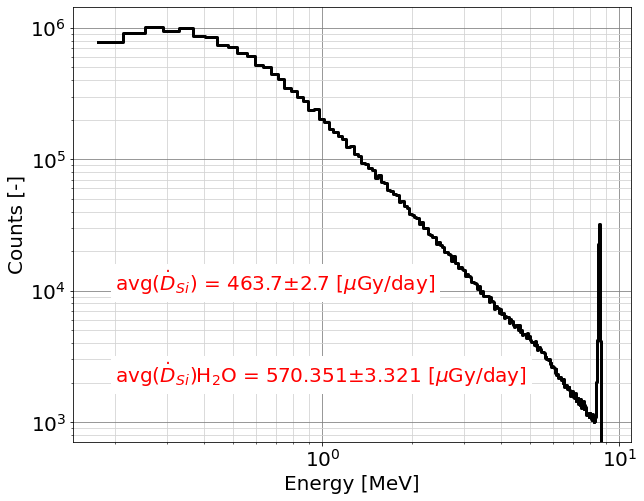

In [9]:
rc['seconds'] = rcc['2']
xx = rc[37432:809620].copy()

#xx = xx.loc[(xx['sum']>100) & (xx['sum']<10000)]
#xx = xx.loc[(xx['sum']>500) & (xx['sum']<10000)]
#xx = xx.loc[(xx['sum']>100) & (xx['sum']<500)]
#xx = xx.loc[(xx['sum']>10) & (xx['sum']<13)]
print(len(xx))

CHANNELS = 245
NOISE_LEVEL = 7
FROM_ENERGY = 3

ee = pd.DataFrame()
ee['Ch']=range(0,256)
ee['ener'] = ee.index * 0.038 + 0.105 #- 0.038/2
#xx = pd.DataFrame(spectra)
#xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(e.loc[2:CHANNELS+1,'ener'])).sum(axis=1)
xx['ener'] = ((xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener'])).sum(axis=1)
#xx['date'] = c_all.index
xx['time'] = np.linspace(0, len(xx)*10.4, len(xx))


xx['ddsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 * 24 # in uGy/day
xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3))


DEATH_TIME = 1

dose = xx
avg_ddsi = round(xx['ddsi'].mean(), 1)
#avg_ddsi_err = round(xx['ddsi'].std(), 1)
avg_ddsi_err = round(xx['ddsi'].sem(), 1)
sum_dsi = round(xx['dsi'].sum()*DEATH_TIME/1e3,1)
sum_dh2o = round(sum_dsi * 1.23,1)

print(len(xx))

plt.figure(figsize=(10,8))
matplotlib.rcParams.update({'font.size': 20})

plt.tight_layout()
plt.yscale('log')
plt.xscale('log')

plt.plot(e['x'],e['1'], c='black', lw=3, drawstyle='steps-post', label='SPACEDOS')
#plt.legend()
plt.xlabel('Energy [MeV]')
plt.ylabel('Counts [-]')
#plt.grid()
plt.grid(visible=True, which='major', color='gray', linestyle='-')
plt.grid(visible=True, which='minor', color='lightgray', linestyle='-')
plt.text(0.2, 1e4, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=20, color='r', backgroundcolor='white')
plt.text(0.2, 2e3, r'avg($\.D$$_S$$_i$)H$_2$O = '+ str(avg_ddsi*1.23) + '$\pm$' + str(avg_ddsi_err*1.23) + ' [$\mu$Gy/day]', fontsize=20, color='r', backgroundcolor='white')
#plt.text(4, 2e6, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='r', backgroundcolor='white')
#plt.text(4, 1e6, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')
#plt.text(4, 5e5, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='red', backgroundcolor='white')

hist = xx.sum()[NOISE_LEVEL:NOISE_LEVEL+CHANNELS]
ener = ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener']
#plt.plot(ener,hist)
plt.show()

None

All 0 100000 10000
772138


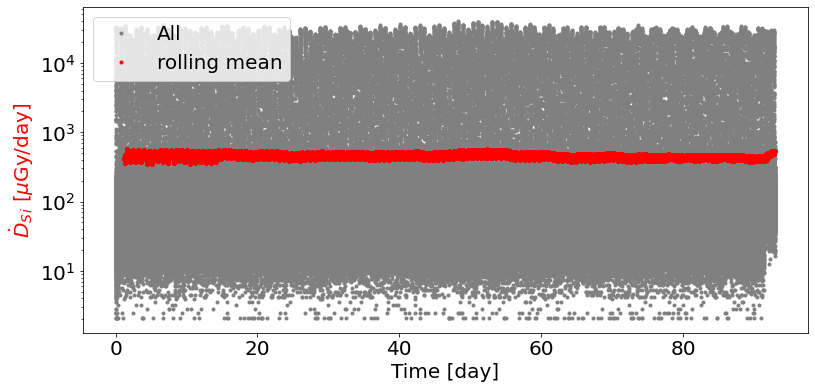

772138
SAA 80 100000 1000
30994


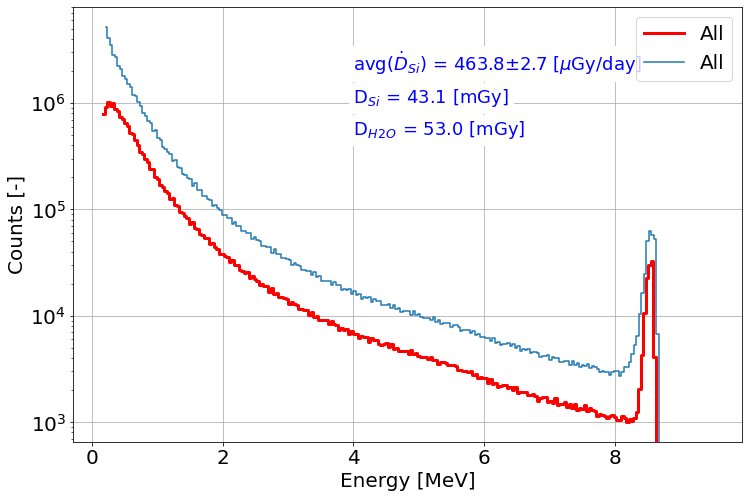

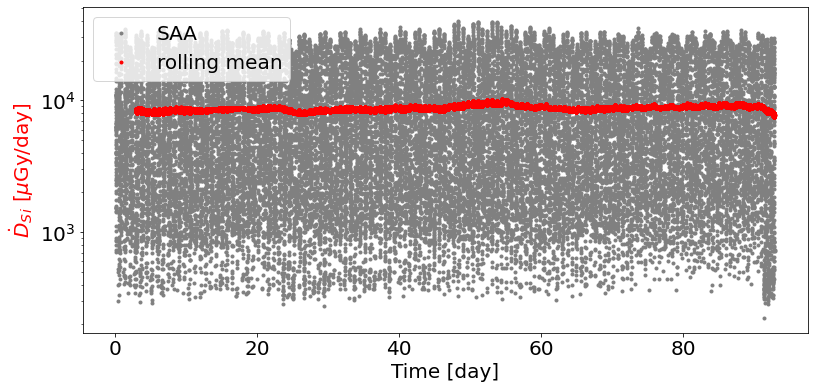

30994
Rest 0 80 10000
740925


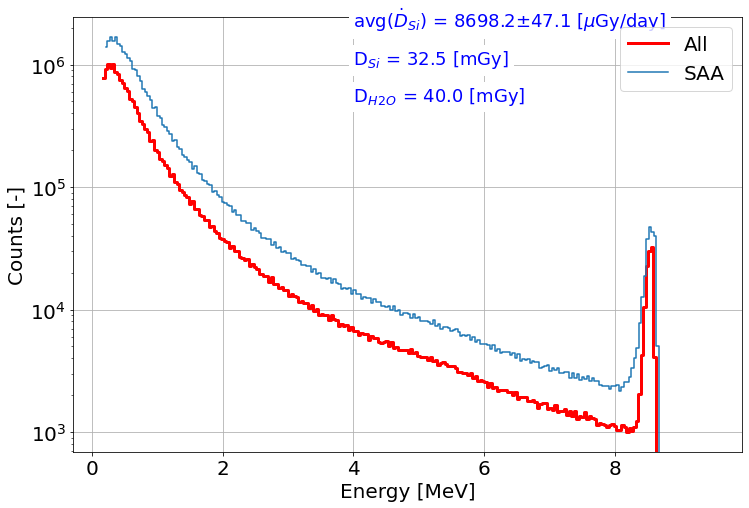

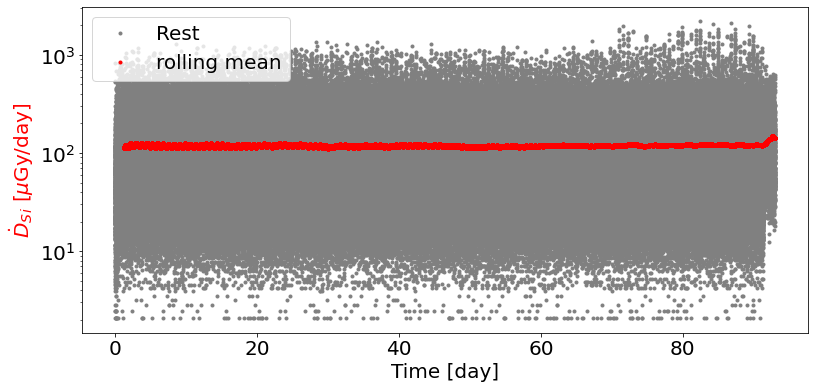

740925


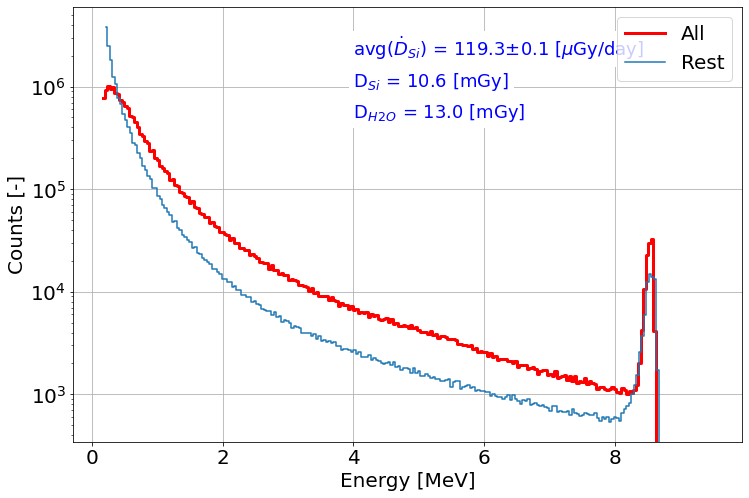

In [10]:
for name, min, max, window in [['All',0,100000,10000], ['SAA',80,100000,1000], ['Rest',0,80,10000]]:
    print(name, min, max, window)
    
    xx = rc[37432:809620].copy()
    #xx = rc[607432:709620].copy()
    #xx = rc[:].copy()
    
    xx['time'] = np.linspace(0, len(xx)*10.4/86400, len(xx))
    xx = xx.loc[(xx['sum']>min) & (xx['sum']<max)]
    print(len(xx))

    CHANNELS = 245
    NOISE_LEVEL = 7
    FROM_ENERGY = 3

    ee = pd.DataFrame()
    ee['Ch']=range(0,256)
    ee['ener'] = ee.index * 0.038 + 0.105
    #xx = pd.DataFrame(spectra)
    #xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(e.loc[2:CHANNELS+1,'ener'])).sum(axis=1)
    xx['ener'] = ((xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener'])).sum(axis=1)
    #xx['date'] = c_all.index

    plt.figure(figsize=(13, 6))

    xx['ddsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 * 24 # in uGy/day
    xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3))
    
    xx['ddsi_mean'] = xx['ddsi'].rolling(window). mean()

    plt.plot( xx.time, xx['ddsi'], c='gray', linestyle='', marker='.', label=name)
    plt.plot( xx.time, xx['ddsi_mean'], c='red', linestyle='', marker='.', label='rolling mean')

    #plt.ylim([0,4])
    plt.yscale('log')

    plt.xlabel('Time [day]')
    plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/day]', color='red')
    plt.legend(loc=2)

    DEATH_TIME = 1

    dose = xx
    avg_ddsi = round(xx['ddsi'].mean(), 1)
    avg_ddsi_err = round(xx['ddsi'].sem(), 1)
    sum_dsi = round(xx['dsi'].sum()*DEATH_TIME/1e3,1)
    sum_dh2o = round(sum_dsi * 1.23,1)

    plt.legend(loc=2)
    plt.show()

    print(len(xx))

    plt.figure(figsize=(12,8))
    plt.tight_layout()
    plt.yscale('log')

    plt.plot(e['x'],e['1'], c='r', lw=3, drawstyle='steps-mid', label='All')
    plt.xlabel('Energy [MeV]')
    plt.ylabel('Counts [-]')
    plt.grid()
    plt.text(4, 2e6, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='blue', backgroundcolor='white')
    plt.text(4, 1e6, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='blue', backgroundcolor='white')
    plt.text(4, 5e5, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='blue', backgroundcolor='white')

    hist = xx.sum()[NOISE_LEVEL:NOISE_LEVEL+CHANNELS]
    ener = ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener']
    plt.plot(ener,hist, drawstyle='steps-mid', label=name)

    plt.legend()

None

All 0 100000 10000
772138


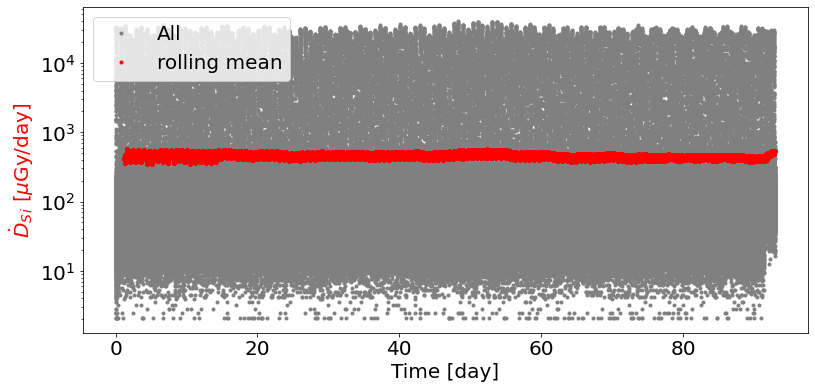

772138
SAA 80 100000 1000
30994


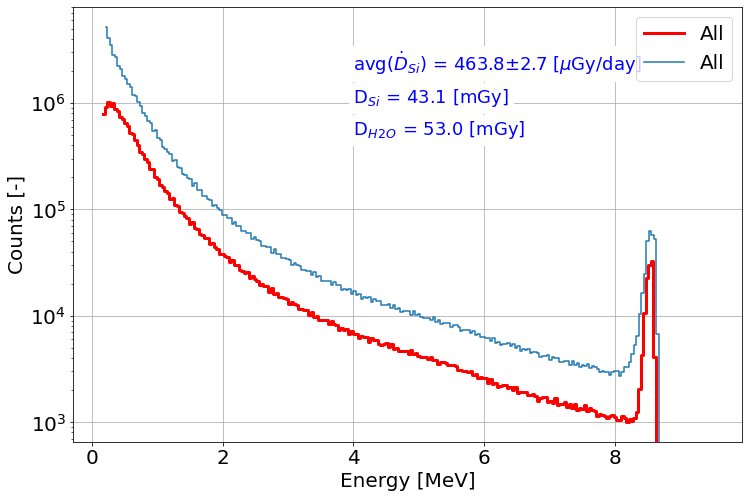

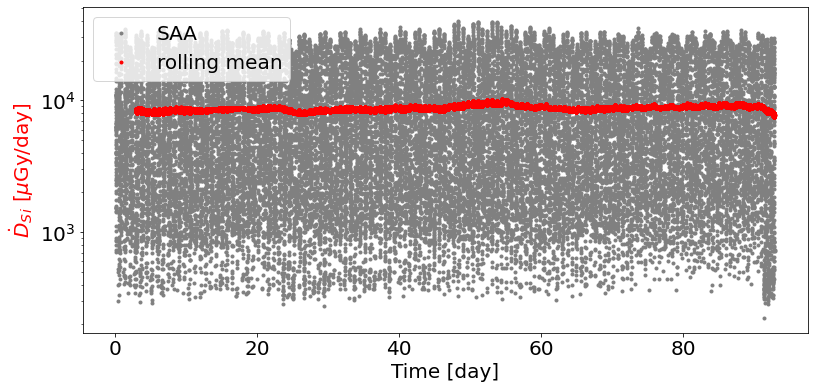

30994
Rest 0 80 10000
740925


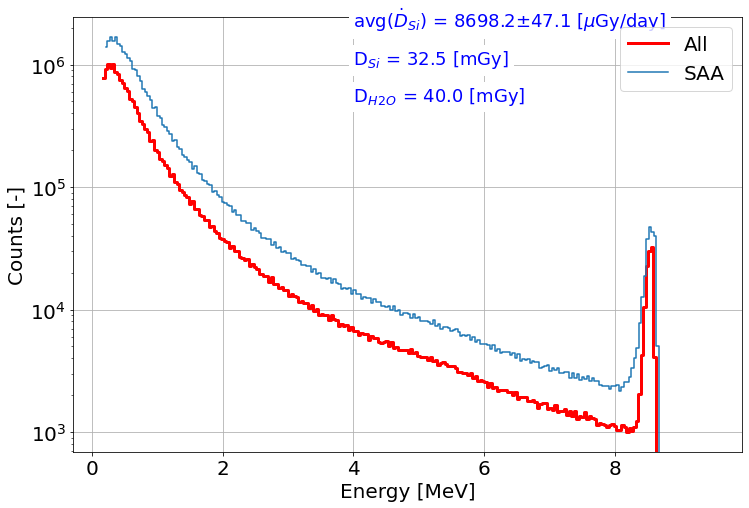

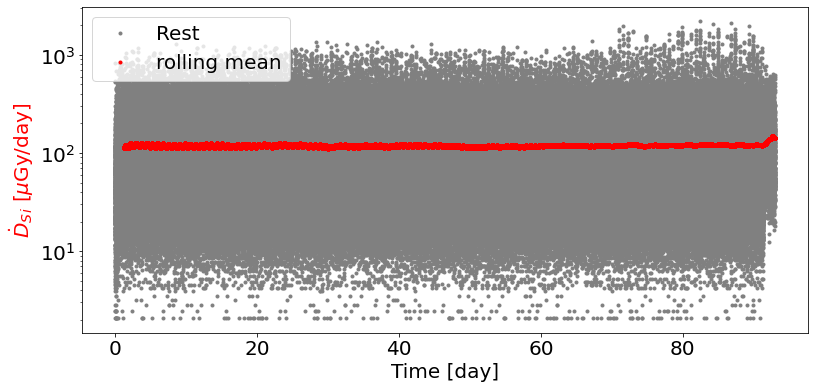

740925


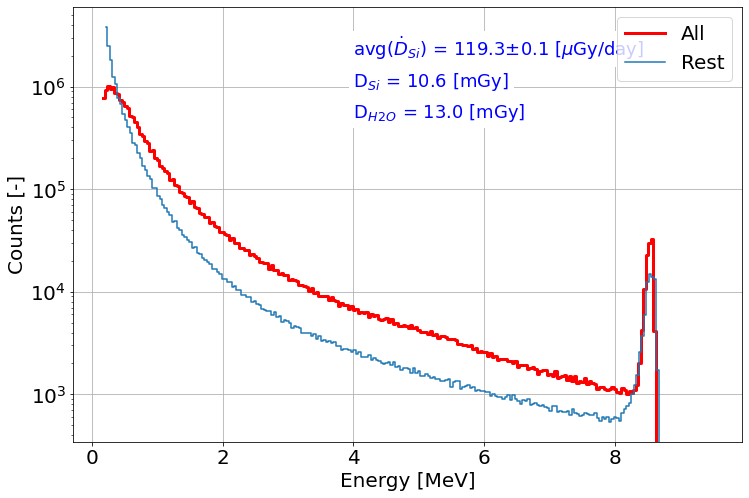

In [19]:
for name, min, max, window in [['All',0,100000,10000], ['SAA',80,100000,1000], ['Rest',0,80,10000]]:
    print(name, min, max, window)
    
    xx = rc[37432:809620].copy()
    #xx = rc[607432:709620].copy()
    #xx = rc[:].copy()
    
    xx['time'] = np.linspace(0, len(xx)*10.4/86400, len(xx))
    xx = xx.loc[(xx['sum']>min) & (xx['sum']<max)]
    print(len(xx))

    CHANNELS = 245
    NOISE_LEVEL = 7
    FROM_ENERGY = 3

    ee = pd.DataFrame()
    ee['Ch']=range(0,256)
    ee['ener'] = ee.index * 0.038 + 0.105
    #xx = pd.DataFrame(spectra)
    #xx['ener'] = (np.asarray(xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(e.loc[2:CHANNELS+1,'ener'])).sum(axis=1)
    xx['ener'] = ((xx.iloc[:,NOISE_LEVEL:NOISE_LEVEL+CHANNELS]) * np.asarray(ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener'])).sum(axis=1)
    #xx['date'] = c_all.index

    plt.figure(figsize=(13, 6))

    xx['ddsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3)/10.4) * 3600 * 24 # in uGy/day
    xx['dsi'] = ((1e6 * (1.602e-19 * xx['ener'] * 1e6)/0.1398e-3))
    
    xx['ddsi_mean'] = xx['ddsi'].rolling(window). mean()

    plt.plot( xx.time, xx['ddsi'], c='gray', linestyle='', marker='.', label=name)
    plt.plot( xx.time, xx['ddsi_mean'], c='red', linestyle='', marker='.', label='rolling mean')

    #plt.ylim([0,4])
    plt.yscale('log')

    plt.xlabel('Time [day]')
    plt.ylabel(r'$\.D$$_S$$_i$ [$\mu$Gy/day]', color='red')
    plt.legend(loc=2)

    DEATH_TIME = 1

    dose = xx
    avg_ddsi = round(xx['ddsi'].mean(), 1)
    avg_ddsi_err = round(xx['ddsi'].sem(), 1)
    sum_dsi = round(xx['dsi'].sum()*DEATH_TIME/1e3,1)
    sum_dh2o = round(sum_dsi * 1.23,1)

    plt.legend(loc=2)
    plt.show()

    print(len(xx))

    plt.figure(figsize=(12,8))
    plt.tight_layout()
    plt.yscale('log')
    #plt.xscale('log')

    plt.plot(e['x'],e['1'], c='r', lw=3, drawstyle='steps-mid', label='All')
    plt.xlabel('Energy [MeV]')
    plt.ylabel('Counts [-]')
    plt.grid()
    plt.text(4, 2e6, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='blue', backgroundcolor='white')
    plt.text(4, 1e6, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='blue', backgroundcolor='white')
    plt.text(4, 5e5, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='blue', backgroundcolor='white')

    hist = xx.sum()[NOISE_LEVEL:NOISE_LEVEL+CHANNELS]
    ener = ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener']
    plt.plot(ener,hist, drawstyle='steps-mid', label=name)

    plt.legend()

None

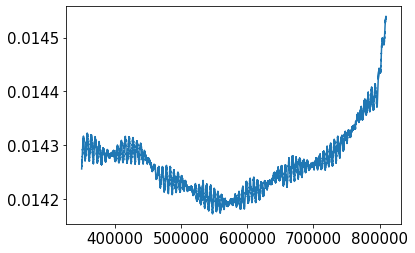

In [306]:
ss = xx['dsi'].rolling(300000).mean()
plt.plot(ss)

# Chorda

In [29]:
a = 10000
b = 20000
c = 300
V = a * b * c
A = 2*a*b + 2*b*c + 2*a*c
chorda = 4 * V / A
print(chorda)

574.1626794258373


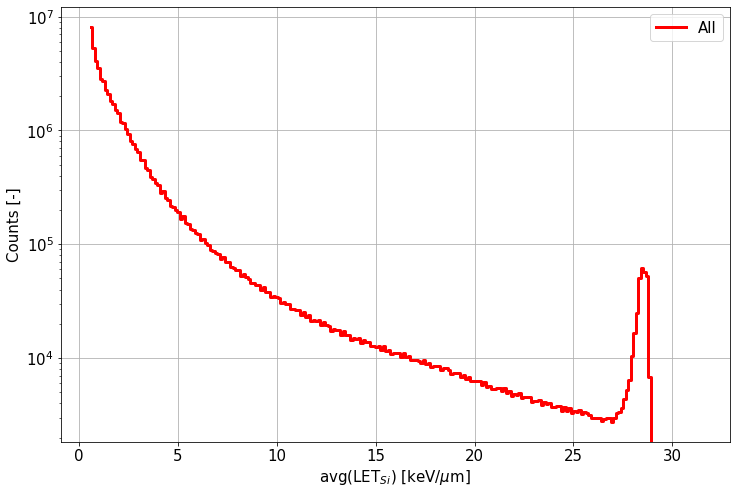

In [36]:
plt.figure(figsize=(12,8))
plt.tight_layout()
plt.yscale('log')

plt.plot(e['x']*1000/chorda,e['1'], c='r', lw=3, drawstyle='steps-mid', label='All')
plt.xlabel('avg(LET$_S$$_i$) [keV/$\mu$m]')
plt.ylabel('Counts [-]')
plt.grid()
#plt.text(4, 2e6, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='blue', backgroundcolor='white')
#plt.text(4, 1e6, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='blue', backgroundcolor='white')
#plt.text(4, 5e5, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='blue', backgroundcolor='white')

hist = xx.sum()[NOISE_LEVEL:NOISE_LEVEL+CHANNELS]
ener = ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener']
#plt.plot(ener*1000/chorda,hist, drawstyle='steps-mid', label=name)

plt.legend()

1    i      x    deposit
98   20878.0   98  3.715  77561.770
99   19509.0   99  3.753  73217.277
100  19260.0  100  3.791  73014.660
101  17359.0  101  3.829  66467.611
102  17859.0  102  3.867  69060.753
..       ...  ...    ...        ...
244      0.0  244  9.263      0.000
245      0.0  245  9.301      0.000
246      0.0  246  9.339      0.000
247      0.0  247  9.377      0.000
248      0.0  248  9.415      0.000

[151 rows x 4 columns]

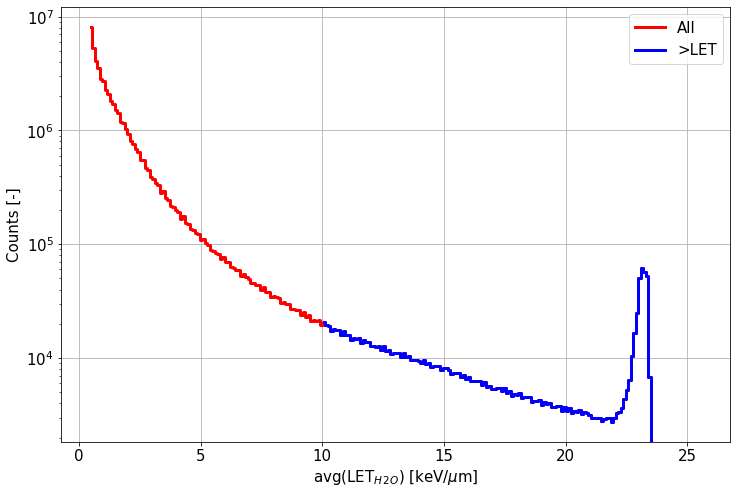

In [35]:
plt.figure(figsize=(12,8))
plt.tight_layout()
plt.yscale('log')

KOEF = 1.23

eee = e.loc[(e['x']*1000/chorda/KOEF) > 10]

plt.plot(e['x']*1000/chorda/KOEF,e['1'], c='r', lw=3, drawstyle='steps-mid', label='All')
plt.plot(eee['x']*1000/chorda/KOEF,eee['1'], c='b', lw=3, drawstyle='steps-mid', label='>LET')

plt.xlabel('avg(LET$_H$$_2$$_O$) [keV/$\mu$m]')
plt.ylabel('Counts [-]')
plt.grid()
#plt.text(4, 2e6, r'avg($\.D$$_S$$_i$) = '+ str(avg_ddsi) + '$\pm$' + str(avg_ddsi_err) + ' [$\mu$Gy/day]', fontsize=18, color='blue', backgroundcolor='white')
#plt.text(4, 1e6, r'D$_S$$_i$ = ' + str(sum_dsi) + r' [mGy]', fontsize=18, color='blue', backgroundcolor='white')
#plt.text(4, 5e5, r'D$_H$$_2$$_O$ = ' + str(sum_dh2o) + r' [mGy]', fontsize=18, color='blue', backgroundcolor='white')

hist = xx.sum()[NOISE_LEVEL:NOISE_LEVEL+CHANNELS]
ener = ee.loc[FROM_ENERGY:CHANNELS+(FROM_ENERGY-1),'ener']
#plt.plot(ener*1000/chorda,hist, drawstyle='steps-mid', label=name)

plt.legend()

eee

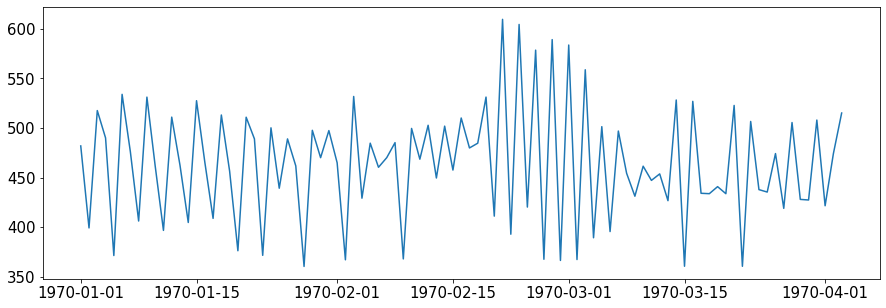

In [76]:
plt.figure(figsize=(15, 5))
xx['date']=pd.to_datetime(xx['time'], unit='s')
xx.set_index('date',inplace=True)
ss = xx.resample('24H').mean()
plt.plot(ss['ddsi'])

In [75]:
ss

Unnamed: 0             0             1             2  \
date                                                                           
1970-01-01 00:00:00  146294.435159  14129.759358  1.947633e+06  1.656546e+06   
1970-01-01 01:00:00  141685.390173  14253.181347  2.017842e+06  1.590573e+06   
1970-01-01 02:00:00  129905.702312  14133.440191  2.185850e+06  1.426047e+06   
1970-01-01 03:00:00  142377.390173  14226.678756  2.023193e+06  1.594615e+06   
1970-01-01 04:00:00  139691.968208  14201.365482  2.067330e+06  1.554871e+06   
...                            ...           ...           ...           ...   
1970-04-03 18:00:00  182246.979769  14530.996540  1.820987e+06  3.588154e+05   
1970-04-03 19:00:00  170469.858382  14528.232082  1.850967e+06  3.345520e+05   
1970-04-03 20:00:00  176877.419075  14714.783505  1.843326e+06  3.480728e+05   
1970-04-03 21:00:00  149545.121037  14627.588040  1.905875e+06  2.910560e+05   
1970-04-03 22:00:00  188909.641509  14684.881818  1.828780e+06  3.736949e+05   

                                3            4          5          6  \
date                                                                   
1970-01-01 00:00:00  14114.218750  7161.582133   4.129683   3.097983   
1970-01-01 01:00:00  14254.549020  7108.635838   3.367052   2.554913   
1970-01-01 02:00:00  14121.525547  7030.026012   6.208092   5.765896   
1970-01-01 03:00:00  14197.091503  7100.956647   4.632948   4.719653   
1970-01-01 04:00:00  14209.563758  7141.895954   4.413295   3.806358   
...                           ...          ...        ...        ...   
1970-04-03 18:00:00  14624.754386  6676.011561  22.228324  14.479769   
1970-04-03 19:00:00  14384.566038  6607.260116  23.843931  17.560694   
1970-04-03 20:00:00  14663.654545  6683.075145  17.263006   9.615607   
1970-04-03 21:00:00  14634.021739  6758.054755  16.299712   8.682997   
1970-04-03 22:00:00  14673.044444  6717.120755  14.618868   7.652830   

                             7          8  ...  253           254  \
date                                       ...                      
1970-01-01 00:00:00   2.302594   1.925072  ...  0.0  13275.763689   
1970-01-01 01:00:00   1.447977   1.089595  ...  0.0  13727.234104   
1970-01-01 02:00:00   6.242775   7.115607  ...  0.0  14887.482659   
1970-01-01 03:00:00   3.991329   3.540462  ...  0.0  13730.078035   
1970-01-01 04:00:00   2.407514   1.757225  ...  0.0  14016.872832   
...                        ...        ...  ...  ...           ...   
1970-04-03 18:00:00  10.164740   9.705202  ...  0.0  20539.910405   
1970-04-03 19:00:00  15.239884  15.630058  ...  0.0  20829.690751   
1970-04-03 20:00:00   5.063584   3.089595  ...  0.0  20643.838150   
1970-04-03 21:00:00   4.417867   2.737752  ...  0.0  21301.847262   
1970-04-03 22:00:00   3.622642   2.271698  ...  0.0  20379.932075   

                              255         256         257         sum  \
date                                                                    
1970-01-01 00:00:00  11401.435159  167.048991  144.974063   61.665706   
1970-01-01 01:00:00  10897.757225  146.742775  116.008671   10.760116   
1970-01-01 02:00:00   9871.358382  227.520231  186.023121  172.910405   
1970-01-01 03:00:00  10919.317919  169.390173  126.878613   48.176301   
1970-01-01 04:00:00  10620.627168  152.439306  114.838150   16.982659   
...                           ...         ...         ...         ...   
1970-04-03 18:00:00   4220.560694  223.508671  148.309249  155.060694   
1970-04-03 19:00:00   3993.300578  272.447977  177.884393  244.482659   
1970-04-03 20:00:00   3955.826590  219.135838   51.026012   31.699422   
1970-04-03 21:00:00   3302.910663  224.685879   40.717579   25.414986   
1970-04-03 22:00:00   4210.392453  215.626415   49.943396   22.630189   

                           ener          time         ddsi       dsi  
date                                                                  
1970-01-01 00:00:00   71.289758  1.799202e+03   678.6766

# Time causality

In [239]:
fto = 'iss.csv' #  File to Open
rc = pd.read_csv(fto, sep=',', header=0, comment='*')#,engine='python' )


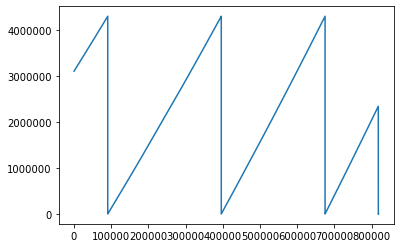

In [243]:
rc.iloc[:,3].plot()

# Sokrat R

In [57]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs

#rc = pd.DataFrame(columns=['NULL'], index=pd.date_range('2019-10-01T00:00:00Z', '2019-10-01T23:55:00Z', freq='15s'))
rc = pd.DataFrame(columns=['NULL'], index=pd.date_range('2019-10-01T00:00:00Z', '2019-10-01T23:55:00Z', freq='15s'))
#rc = pd.DataFrame(columns=['NULL'], index=pd.date_range('2020-04-13T13:15:00Z', '2020-04-13T14:00:00Z', freq='15s'))

ts = load.timescale(builtin=True)

TLE = """SOKRAT 
1 44404U 19038U   20107.38867253 +.00001019 +00000-0 +62373-4 0  9995
2 44404 097.5321 069.5515 0022149 350.5531 009.5280 15.12291208043200
"""
name, L1, L2 = TLE.splitlines()

sat = EarthSatellite(L1, L2)

#minutes = np.arange(0, 180, 1) # about two orbits
#times   = ts.utc(2019, 9, 25, 13, minutes)
#fr = pd.to_datetime('2019-09-30').tz_localize('UTC')
#to = pd.to_datetime('2019-11-30').tz_localize('UTC')
#times = ts.utc(rc[fr:to].index)
times = ts.utc(rc.index)


geocentric = sat.at(times)
subsat = geocentric.subpoint()

fig = plt.figure(figsize=(26, 10))
matplotlib.rcParams.update({'font.size': 16})

#plt.tight_layout()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertCylindrical())
ax.gridlines(draw_labels=False)

ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.stock_img()

#sc = plt.scatter(subsat.longitude.degrees, subsat.latitude.degrees, s=6, lw=0, cmap='jet', c=rc[fr:to]['sum']/11/2, norm=matplotlib.colors.LogNorm())
sc = plt.scatter(subsat.longitude.degrees, subsat.latitude.degrees, s=10, lw=0, cmap='jet', c='red', norm=matplotlib.colors.LogNorm())
#plt.scatter(subsat.longitude.degrees, subsat.latitude.degrees, s=10, lw=0, cmap='gist_rainbow', c=rc[fr:to]['sum'])
#plt.tricontour(subsat.longitude.degrees, subsat.latitude.degrees, rc[fr:to]['sum'], 500, linewidths=20, cmap='jet')
cb = plt.colorbar(sc)
cb.set_label(r'Flux [cm$^-$$^2$ s$^-$$^1$]')

NameError: name 'load' is not defined

In [56]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs

#rc = pd.DataFrame(columns=['NULL'], index=pd.date_range('2019-10-01T00:00:00Z', '2019-10-01T23:55:00Z', freq='15s'))
rc2 = pd.DataFrame(columns=['NULL'], index=pd.date_range('2020-04-13T00:00:00Z', '2020-04-14T00:00:00Z', freq='15s'))
rc = pd.DataFrame(columns=['NULL'], index=pd.date_range('2020-04-13T13:08:00Z', '2020-04-13T14:00:00Z', freq='15s'))

rc['NULL'].iloc[:len(run['flux'])]=run['flux'].values

#rc = rc.fillna(method='ffill')

ts = load.timescale(builtin=True)

TLE = """SOKRAT 
1 44404U 19038U   20107.38867253 +.00001019 +00000-0 +62373-4 0  9995
2 44404 097.5321 069.5515 0022149 350.5531 009.5280 15.12291208043200
"""
name, L1, L2 = TLE.splitlines()

sat = EarthSatellite(L1, L2)

#minutes = np.arange(0, 180, 1) # about two orbits
#times   = ts.utc(2019, 9, 25, 13, minutes)
#fr = pd.to_datetime('2019-09-30').tz_localize('UTC')
#to = pd.to_datetime('2019-11-30').tz_localize('UTC')
#times = ts.utc(rc[fr:to].index)
times = ts.utc(rc.index)
times2 = ts.utc(rc2.index)


geocentric = sat.at(times)
subsat = geocentric.subpoint()
geocentric = sat.at(times2)
subsat2 = geocentric.subpoint()

fig = plt.figure(figsize=(26, 10))
matplotlib.rcParams.update({'font.size': 16})

#plt.tight_layout()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertCylindrical())
ax.gridlines(draw_labels=False)

ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.stock_img()

#sc = plt.scatter(subsat.longitude.degrees, subsat.latitude.degrees, s=6, lw=0, cmap='jet', c=rc[fr:to]['sum']/11/2, norm=matplotlib.colors.LogNorm())
sc = plt.scatter(subsat2.longitude.degrees, subsat2.latitude.degrees, s=10, lw=0, c='grey', norm=matplotlib.colors.LogNorm())
sc = plt.scatter(subsat.longitude.degrees, subsat.latitude.degrees, s=30, lw=0, cmap='plasma', c=rc['NULL'], norm=matplotlib.colors.LogNorm())
#plt.scatter(subsat.longitude.degrees, subsat.latitude.degrees, s=10, lw=0, cmap='gist_rainbow', c=rc[fr:to]['sum'])
#plt.tricontour(subsat.longitude.degrees, subsat.latitude.degrees, rc[fr:to]['sum'], 500, linewidths=20, cmap='jet')
cb = plt.colorbar(sc)
cb.set_label(r'Flux [cm$^-$$^2$ s$^-$$^1$]')

NameError: name 'load' is not defined

Text(0.5, 1.0, 'SOKRAT - SPACEDOS')

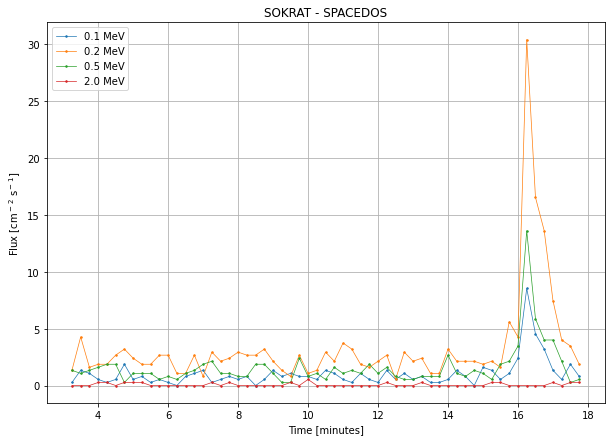

In [53]:
df = pd.read_csv('/storage/experiments/2020/04_sokrat/ble.csv',header=None)
run = df.loc[:,1:].copy()
#run[2] = (df[0]-1)*30+df[2]
run = run.set_index(run[1])
run = run.loc[:,2:].diff()
#run[1] = df[2]
#run = run.set_index(run[1])
#run = run[run.index<19]

#%matplotlib notebook
%matplotlib inline
#plt.figure(figsize=(9,5))
plt.figure(figsize=(10,7))
plt.plot(run.index*15/60,run[2]*4/15, marker='.', lw=0.7, markersize=3, label='0.1 MeV')
plt.plot(run.index*15/60,(run[3]+run[4])*4/15, marker='.', lw=0.7, markersize=3, label='0.2 MeV')
plt.plot(run.index*15/60,(run[5]+run[6])*4/15, marker='.', lw=0.7, markersize=3, label='0.5 MeV')
plt.plot(run.index*15/60,(run[7]+run[8])*4/15, marker='.', lw=0.7, markersize=3, label='2.0 MeV')
plt.legend()
#plt.xlim(0,10)
#plt.ylim(0,18)
plt.grid()

plt.xlabel('Time [minutes]')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
plt.title('SOKRAT - SPACEDOS')

Text(0.5, 1.0, 'SOKRAT - SPACEDOS')

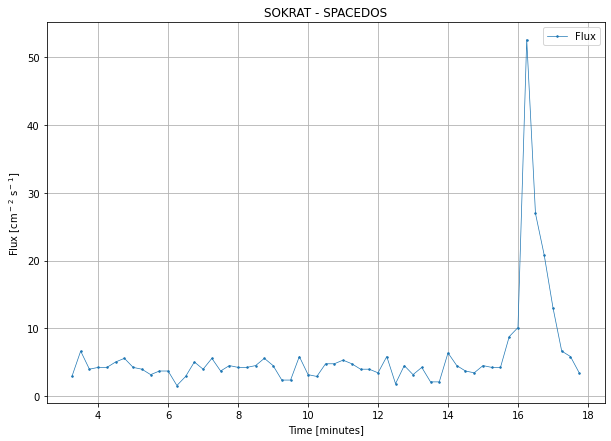

In [55]:
df = pd.read_csv('/storage/experiments/2020/04_sokrat/ble.csv',header=None)
run = df.loc[:,1:].copy()
#run[2] = (df[0]-1)*30+df[2]
run = run.set_index(run[1])
run = run.loc[:,2:].diff()
#run[1] = df[2]
#run = run.set_index(run[1])
#run = run[run.index<19]

#%matplotlib notebook
%matplotlib inline
#plt.figure(figsize=(9,5))
plt.figure(figsize=(10,7))

run['flux'] = (run[2]+run[3]+run[4]+run[5]+run[6]+run[7]+run[8])*4/15

plt.plot(run.index*15/60,run.flux, marker='.', lw=0.7, markersize=3, label='Flux')
plt.legend()
#plt.xlim(0,10)
#plt.ylim(0,18)
plt.grid()

plt.xlabel('Time [minutes]')
plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
plt.title('SOKRAT - SPACEDOS')

In [69]:
#rc['flux']=run['flux'].values
len(run['flux'])
rc['NULL'].iloc[:len(run['flux'])]=run['flux'].values
rc

NULL
2020-04-13 13:15:00+00:00      NaN
2020-04-13 13:15:15+00:00  2.93333
2020-04-13 13:15:30+00:00  6.66667
2020-04-13 13:15:45+00:00        4
2020-04-13 13:16:00+00:00  4.26667
...                            ...
2020-04-13 13:59:00+00:00      NaN
2020-04-13 13:59:15+00:00      NaN
2020-04-13 13:59:30+00:00      NaN
2020-04-13 13:59:45+00:00      NaN
2020-04-13 14:00:00+00:00      NaN

[181 rows x 1 columns]

# ISS 2020-2021

In [3]:
fto = '/storage/experiments/2021/08_ISS_SPACEDOS/DATALOG.TXT' #  File to Open

print (fto)

l=[]
l.extend(range(0,28))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*')#,engine='python' )
df = df.reset_index(drop=True)

/storage/experiments/2021/08_ISS_SPACEDOS/DATALOG.TXT


/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0, 0.5, 'Flux [counts per 10 s]')

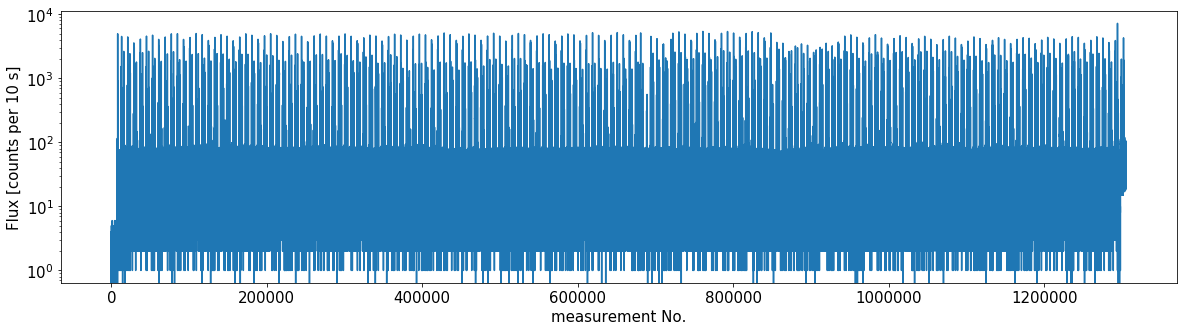

In [7]:
%matplotlib inline

rc = df.loc[df[0]=='$CANDY']
rc.reset_index(drop=True, inplace=True)

rc = rc.apply(pd.to_numeric, errors='coerce')

rc['sum'] = rc.iloc[:,9:28].sum(axis=1)

plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

rc['sum'].plot()
plt.yscale('log')

plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 10 s]')
#plt.xlim([287000,289000])
#plt.ylim([0,4000])


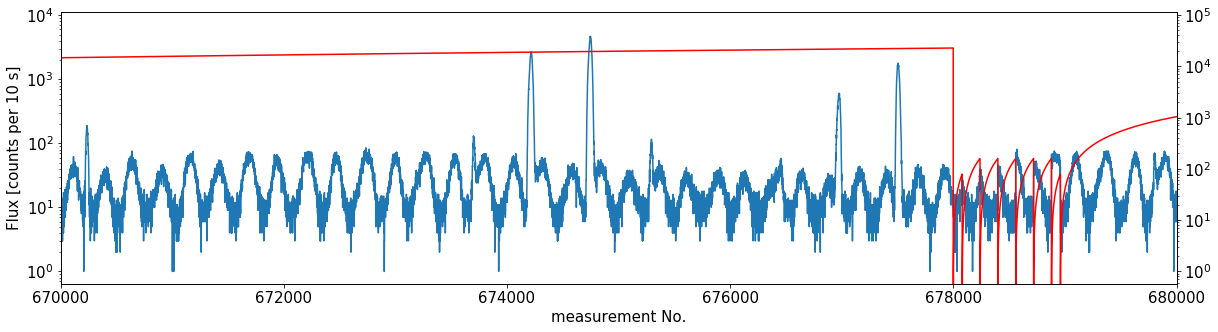

In [14]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

rc['sum'].plot()
plt.yscale('log')

plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 10 s]')
plt.xlim([670000,680000])
#plt.ylim([0,4000])

plt.twinx()
rc[1].plot(c='r')
plt.yscale('log')


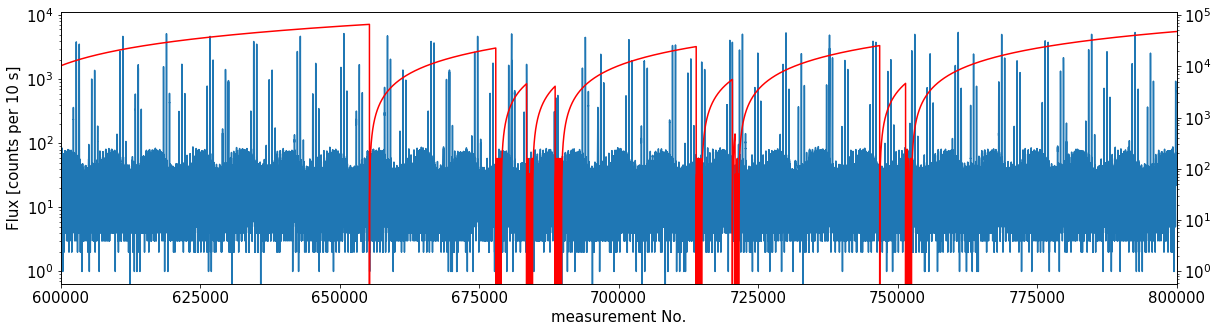

In [54]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

rc['sum'].plot()
plt.yscale('log')

plt.xlabel('measurement No.')
plt.ylabel('Flux [counts per 10 s]')
plt.xlim([600000,800000])
#plt.ylim([0,4000])

plt.twinx()
rc[1].plot(c='r')
plt.yscale('log')


In [8]:
rc.iloc[677999:,:]

0      1           2      3    4     5        6       7     8     9  \
677999  NaN  22639  14741378.0  24622  260   4.0  14426.0  6913.0  24.0   1.0   
678000  NaN      0        41.0  24586  259   1.0  14376.0  6996.0  31.0   3.0   
678001  NaN      1        52.0  24663  260   0.0  14174.0  7121.0  35.0   4.0   
678002  NaN      2        62.0  24697  259   1.0  14114.0  7140.0  34.0   3.0   
678003  NaN      3        73.0  24563  260   5.0  14886.0  6501.0  37.0   4.0   
...      ..    ...         ...    ...  ...   ...      ...     ...   ...   ...   
1304795 NaN  60619   4875058.0  24444  259  13.0  16230.0  5199.0  62.0  26.0   
1304796 NaN  60620   4875069.0  24440  259  16.0  16042.0  5385.0  75.0  20.0   
1304797 NaN  60621   4875079.0  24460  259   4.0  16030.0  5401.0  61.0  26.0   
1304798 NaN  60622   4875090.0  24402  259  11.0  16327.0  5160.0  66.0  13.0   
1304799 NaN  60623   4875100.0  24432  260  10.0  15975.0  5499.0  54.0  11.0   

         ...   19   20   21   22   23   24   25   26   27   sum  
677999   ...  0.0  1.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  11.0  
678000   ...  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  10.0  
678001   ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   7.0  
678002   ...  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  14.0  
678003   ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   8.0  
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
1304795  ...  1.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  52.0  
1304796  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  42.0  
1304797  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  44.0  
1304798  ...  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  34.0  
1304799  ...  0.0  2.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  30.0  

[626801 rows x 29 columns]

In [9]:
df.loc[df[0]=='$AIRDOS']

0    1      2        3                                 4   5   \
0        $AIRDOS  S01  260.0  808689c  1290c00806a20091d856a000a00000ce NaN   
678003   $AIRDOS  S01  260.0  808689c  1290c00806a20091d856a000a00000ce NaN   
678086   $AIRDOS  S01  260.0  808689c  1290c00806a20091d856a000a00000ce NaN   
678249   $AIRDOS  S01  260.0  808689c  1290c00806a20091d856a000a00000ce NaN   
678412   $AIRDOS  S01  260.0  808689c  1290c00806a20091d856a000a00000ce NaN   
...          ...  ...    ...      ...                               ...  ..   
1305118  $AIRDOS  S01  260.0  808689c  1290c00806a20091d856a000a00000ce NaN   
1305119  $AIRDOS  S01  260.0  808689c  1290c00806a20091d856a000a00000ce NaN   
1305120  $AIRDOS  S01  260.0  808689c  1290c00806a20091d856a000a00000ce NaN   
1305121  $AIRDOS  S01  260.0  808689c  1290c00806a20091d856a000a00000ce NaN   
1305122  $AIRDOS  S01  260.0  808689c  1290c00806a20091d856a000a00000ce NaN   

         6   7   8   9   ...  18  19  20  21  22  23  24  25  26  27  
0       NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
678003  NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
678086  NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
678249  NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
678412  NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
...      ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  
1305118 NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1305119 NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1305120 NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1305121 NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1305122 NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[202 rows x 28 columns]

In [15]:
print(df.iloc[678002,1])
print(df.iloc[678002,2])
print(df.iloc[1300000,2])
print(df.iloc[678080,2])
print(df.iloc[678081,2])
print(df.iloc[678082,2])
print(df.iloc[678083,2])
print(df.iloc[678084,2])
print(df.iloc[678085,2])
print(df.iloc[678086,2])
print(df.iloc[678087,2])
print(df.iloc[678088,2])
print(df.iloc[678089,2])


22639
14741378.0
4820280.0
827.0
838.0
848.0
859.0
870.0
880.0
260.0
nan
nan
41.0


Text(0.5, 0, 'Measurement No. [-]')

/nix/store/bd5a7gsg47qnkwywa7r5p7vnyyvpakya-python3-3.7.6-env/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


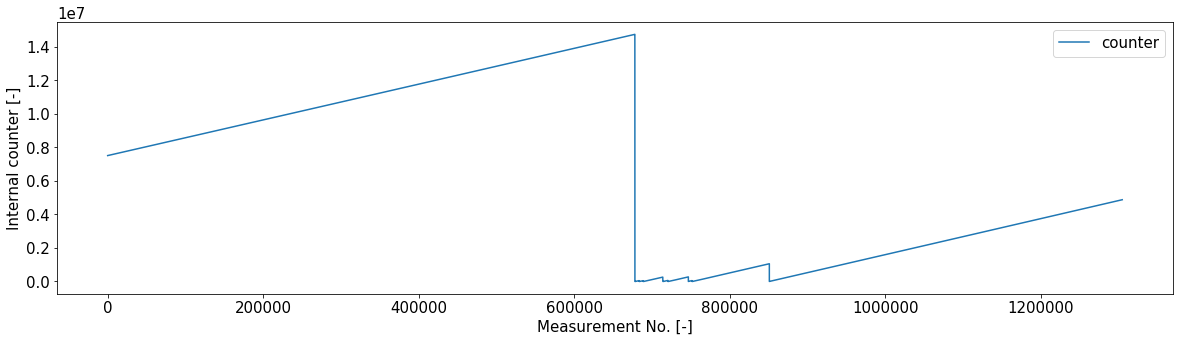

In [12]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

rc[2].plot(label='counter')
plt.legend()
plt.ylabel('Internal counter [-]')
plt.xlabel('Measurement No. [-]')


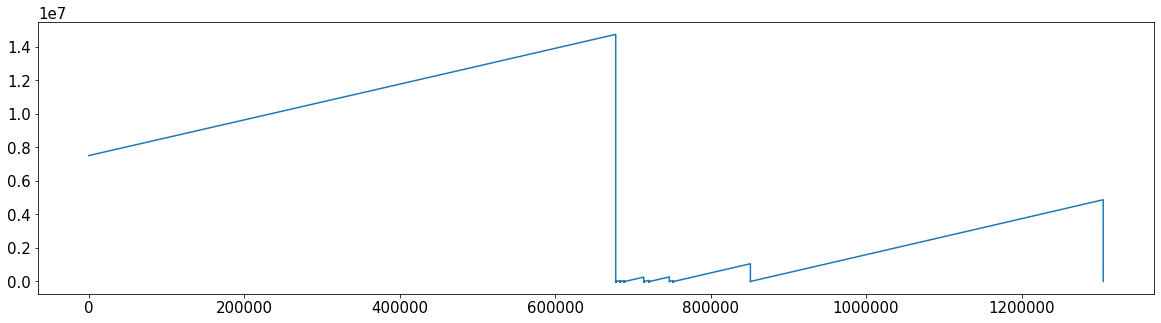

In [64]:
plt.figure(figsize=(20,5))
matplotlib.rcParams.update({'font.size': 15})

df[2].plot()

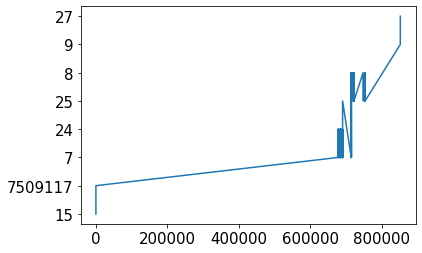

In [59]:
plt.plot(df.loc[df[0]=='$TIME'][1])

# Liulin 2001

In [6]:

liulin = pd.read_csv('/storage/experiments/2020/02_ISS_SPACEDOS/Liulin2001/Liulin_ISS2001.txt',delimiter = '\t', header=2)


In [7]:
liulin

bin     Edep  Events  Events.1
0      1   0.0000  219477     20009
1      2   0.0814  304504     35983
2      3   0.1628  148651     34877
3      4   0.2442   91893     35130
4      5   0.3256   58686     30779
..   ...      ...     ...       ...
251  252  20.4314       0         0
252  253  20.5128       0         0
253  254  20.5942       0         0
254  255  20.6756       0         0
255  256  20.7570     806       236

[256 rows x 4 columns]

0.1 0.038


/tmp/ipykernel_21791/2670380969.py:44: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', linestyle='-')
/tmp/ipykernel_21791/2670380969.py:45: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='lightgray', linestyle='-')


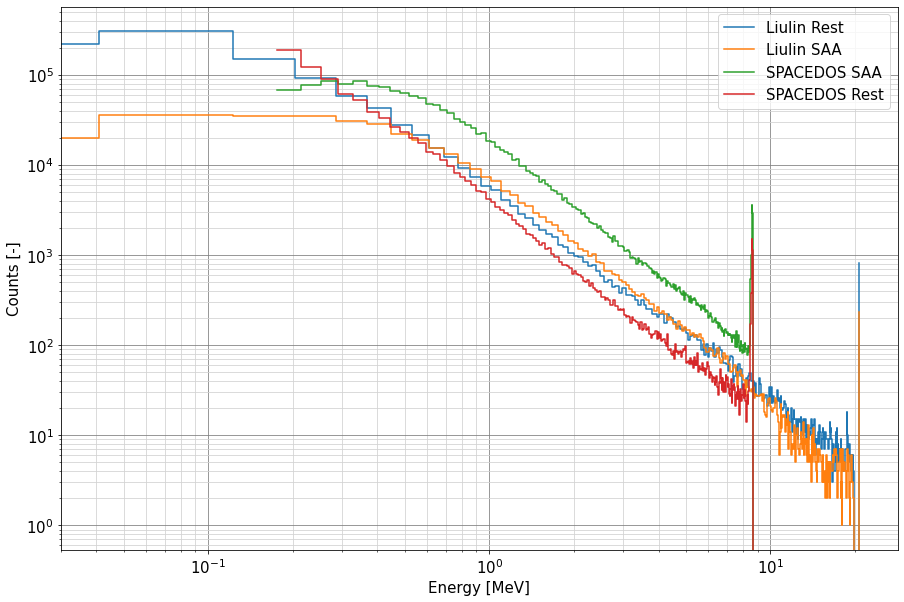

In [14]:
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(liulin['Edep'], liulin['Events'], drawstyle='steps-mid', label='Liulin Rest')
plt.plot(liulin['Edep'], liulin['Events.1'], drawstyle='steps-mid', label='Liulin SAA')
plt.yscale('log')
plt.xscale('log')

plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
plt.grid(which='both')
plt.legend()


coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.1

print (coef[0], coef[1])

e = pd.DataFrame()
e['1'] = ener1
e['2'] = ener2
e['3'] = ener3
e['i'] = ener1.index
e['x'] = (e['i'].astype(float)-4) * coef[1] + coef[0]

plt.yscale('log')
plt.xscale('log')

plt.plot(e['x'], e['1'] + e['2'], label='SPACEDOS SAA',  drawstyle='steps-post')
#plt.plot(e['x'], e['2'] , label='SPACEDOS SAA Boundary',  drawstyle='steps-post')
plt.plot(e['x'], e['3'] , label='SPACEDOS Rest',  drawstyle='steps-post')

#plt.ylim([0,12000])
#plt.xlim([0,40])
plt.legend()#loc=9)
#plt.title('SPACEDOS - ISS')
plt.xlabel('Energy [MeV]')
#plt.ylabel(r'Flux [cm$^-$$^2$ s$^-$$^1$]')
plt.ylabel(r'Counts [-]')
#plt.xticks(rotation=90)
#plt.grid()
plt.grid(b=True, which='major', color='gray', linestyle='-')
plt.grid(b=True, which='minor', color='lightgray', linestyle='-')


0.1 0.038
5.688759999999999
131.94968


/tmp/ipykernel_21791/3459015092.py:53: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', linestyle='-')
/tmp/ipykernel_21791/3459015092.py:54: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='lightgray', linestyle='-')


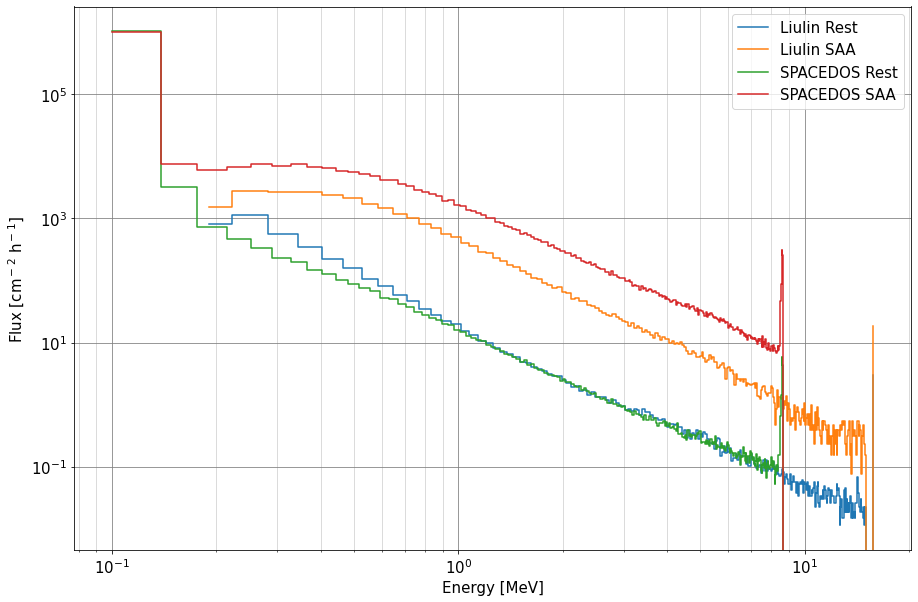

In [21]:
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(liulin['bin']*0.061+0.130, liulin['Events']/2/133, drawstyle='steps-mid', label='Liulin Rest')
plt.plot(liulin['bin']*0.061+0.130, liulin['Events.1']/2/6.5, drawstyle='steps-mid', label='Liulin SAA')
plt.yscale('log')
plt.xscale('log')

plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
plt.grid(which='both')
plt.legend()


coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.1 

print (coef[0], coef[1])

e = pd.DataFrame()
e['1'] = ener1
e['2'] = ener2
e['3'] = ener3
e['i'] = ener1.index
e['x'] = (e['i'].astype(float)-4) * coef[1] + coef[0]

plt.yscale('log')
plt.xscale('log')


print(len(rcc.loc[(rcc['sum']>80) & (rcc['sum']<10000)]['time'])* 0.003694)
print(len(rcc.loc[(rcc['sum']>0) & (rcc['sum']<80)]['time'])* 0.003694)

#plt.plot(e['x'], e['1'] , label='SPACEDOS SAA',  drawstyle='steps-post')
#plt.plot(e['x'], e['2'] , label='SPACEDOS SAA Boundary',  drawstyle='steps-post')
plt.plot(e['x'], e['3']/2/(len(rcc.loc[(rcc['sum']>0) & (rcc['sum']<80)]['time'])* 0.003694), label='SPACEDOS Rest',  drawstyle='steps-post')
plt.plot(e['x'], (e['1'] + e['2'])/2/(len(rcc.loc[(rcc['sum']>80) & (rcc['sum']<10000)]['time'])* 0.003694) , label='SPACEDOS SAA',  drawstyle='steps-post')

#plt.plot(e['x'], e['1']/11/2/LENGTH , label='SAA Center', lw=2, drawstyle='steps-post', linestyle='-')
#plt.plot(e['x'], e['2']/11/2/LENGTH , label='SAA Edge', lw=2, drawstyle='steps-post', linestyle='-')
#plt.plot(e['x'], e['3']/11/2/LENGTH , label='Equator', lw=2, drawstyle='steps-post', linestyle='-')

#plt.ylim([0,12000])
#plt.xlim([0,40])
plt.legend()#loc=9)
#plt.title('SPACEDOS - ISS')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Flux [cm$^-$$^2$ h$^-$$^1$]')
#plt.ylabel(r'Counts [-]')
#plt.xticks(rotation=90)
#plt.grid()
plt.grid(b=True, which='major', color='gray', linestyle='-')
plt.grid(b=True, which='minor', color='lightgray', linestyle='-')


0.1 0.038
5.688759999999999
131.94968


/tmp/ipykernel_21791/1138813624.py:53: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', linestyle='-')
/tmp/ipykernel_21791/1138813624.py:54: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='lightgray', linestyle='-')


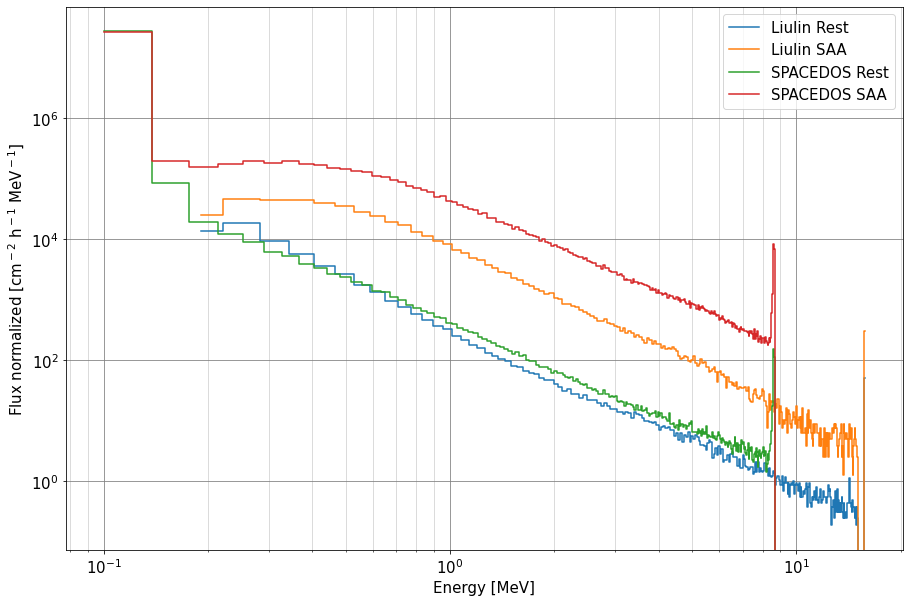

In [22]:
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(liulin['bin']*0.061+0.130, liulin['Events']/2/133/0.061, drawstyle='steps-mid', label='Liulin Rest')
plt.plot(liulin['bin']*0.061+0.130, liulin['Events.1']/2/6.5/0.061, drawstyle='steps-mid', label='Liulin SAA')
plt.yscale('log')
plt.xscale('log')

plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
plt.grid(which='both')
plt.legend()


coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.1

print (coef[0], coef[1])

e = pd.DataFrame()
e['1'] = ener1
e['2'] = ener2
e['3'] = ener3
e['i'] = ener1.index
e['x'] = (e['i'].astype(float)-4) * coef[1] + coef[0]

plt.yscale('log')
plt.xscale('log')


print(len(rcc.loc[(rcc['sum']>80) & (rcc['sum']<10000)]['time'])* 0.003694)
print(len(rcc.loc[(rcc['sum']>0) & (rcc['sum']<80)]['time'])* 0.003694)

#plt.plot(e['x'], e['1'] , label='SPACEDOS SAA',  drawstyle='steps-post')
#plt.plot(e['x'], e['2'] , label='SPACEDOS SAA Boundary',  drawstyle='steps-post')
plt.plot(e['x'], e['3']/2/(len(rcc.loc[(rcc['sum']>0) & (rcc['sum']<80)]['time'])* 0.003694)/0.038, label='SPACEDOS Rest',  drawstyle='steps-post')
plt.plot(e['x'], (e['1'] + e['2'])/2/(len(rcc.loc[(rcc['sum']>80) & (rcc['sum']<10000)]['time'])* 0.003694)/0.038 , label='SPACEDOS SAA',  drawstyle='steps-post')

#plt.plot(e['x'], e['1']/11/2/LENGTH , label='SAA Center', lw=2, drawstyle='steps-post', linestyle='-')
#plt.plot(e['x'], e['2']/11/2/LENGTH , label='SAA Edge', lw=2, drawstyle='steps-post', linestyle='-')
#plt.plot(e['x'], e['3']/11/2/LENGTH , label='Equator', lw=2, drawstyle='steps-post', linestyle='-')

#plt.ylim([0,12000])
#plt.xlim([0,40])
plt.legend()#loc=9)
#plt.title('SPACEDOS - ISS')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Flux normalized [cm$^-$$^2$ h$^-$$^1$ MeV$^-$$^1$]')
#plt.ylabel(r'Counts [-]')
#plt.xticks(rotation=90)
#plt.grid()
plt.grid(b=True, which='major', color='gray', linestyle='-')
plt.grid(b=True, which='minor', color='lightgray', linestyle='-')


0.1 0.038
5.688759999999999
131.94968


/tmp/ipykernel_21791/1166912777.py:53: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='gray', linestyle='-')
/tmp/ipykernel_21791/1166912777.py:54: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color='lightgray', linestyle='-')


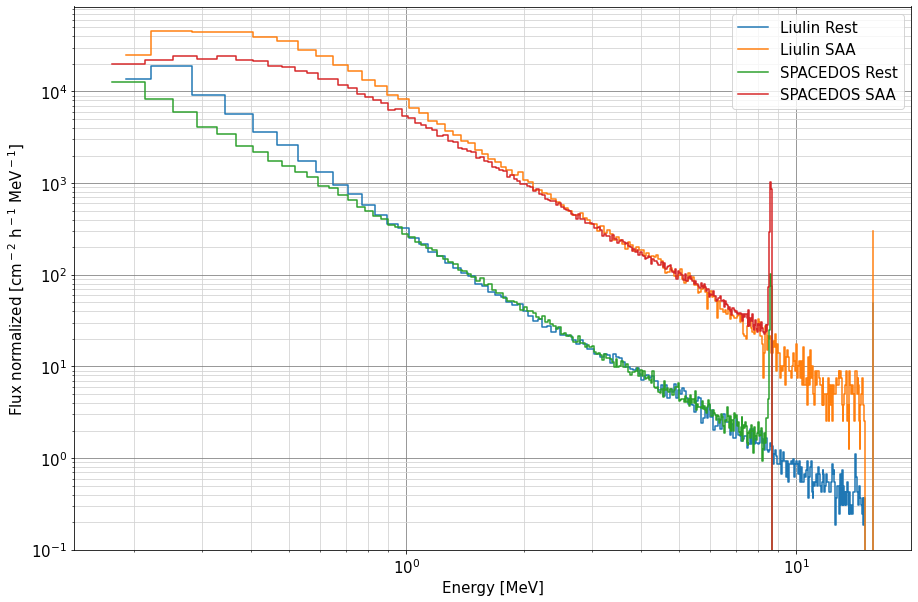

In [42]:
plt.figure(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 15})

plt.plot(liulin['bin']*0.061+0.130, liulin['Events']/2/133/0.061, drawstyle='steps-mid', label='Liulin Rest')
plt.plot(liulin['bin']*0.061+0.130, liulin['Events.1']/2/6.5/0.061, drawstyle='steps-mid', label='Liulin SAA')
plt.yscale('log')
plt.xscale('log')

plt.xlabel('Energy [MeV]')
plt.ylabel(r'Counts scaled [MeV$^{-1}$]')
plt.grid(which='both')
plt.legend()


coef = np.array([0.,0.])
coef[1] = 0.038
coef[0] = 0.1

print (coef[0], coef[1])

e = pd.DataFrame()
e['1'] = ener1
e['2'] = ener2
e['3'] = ener3
e['i'] = ener1.index
e['x'] = (e['i'].astype(float)-4) * coef[1] + coef[0]

plt.yscale('log')
plt.xscale('log')


print(len(rcc.loc[(rcc['sum']>80) & (rcc['sum']<10000)]['time'])* 0.003694)
print(len(rcc.loc[(rcc['sum']>0) & (rcc['sum']<80)]['time'])* 0.003694)

#plt.plot(e['x'], e['1'] , label='SPACEDOS SAA',  drawstyle='steps-post')
#plt.plot(e['x'], e['2'] , label='SPACEDOS SAA Boundary',  drawstyle='steps-post')
plt.plot(e['x'], e['3']/2/(len(rcc.loc[(rcc['sum']>0) & (rcc['sum']<80)]['time'])* 0.003694)/0.038/1.5, label='SPACEDOS Rest',  drawstyle='steps-post')
plt.plot(e['x'], (e['1'] + e['2'])/2/(len(rcc.loc[(rcc['sum']>80) & (rcc['sum']<10000)]['time'])* 0.003694)/0.038 /8  , label='SPACEDOS SAA',  drawstyle='steps-post')

#plt.plot(e['x'], e['1']/11/2/LENGTH , label='SAA Center', lw=2, drawstyle='steps-post', linestyle='-')
#plt.plot(e['x'], e['2']/11/2/LENGTH , label='SAA Edge', lw=2, drawstyle='steps-post', linestyle='-')
#plt.plot(e['x'], e['3']/11/2/LENGTH , label='Equator', lw=2, drawstyle='steps-post', linestyle='-')

#plt.ylim([0,12000])
#plt.xlim([0,40])
plt.legend()#loc=9)
#plt.title('SPACEDOS - ISS')
plt.xlabel('Energy [MeV]')
plt.ylabel(r'Flux normalized [cm$^-$$^2$ h$^-$$^1$ MeV$^-$$^1$]')
#plt.ylabel(r'Counts [-]')
#plt.xticks(rotation=90)
#plt.grid()
plt.grid(b=True, which='major', color='gray', linestyle='-')
plt.grid(b=True, which='minor', color='lightgray', linestyle='-')


In [24]:
e

1          2            3    i      x
4    5774569.0  5564364.0  274615896.0    4  0.100
5      61517.0    23975.0     841907.0    5  0.138
6      57596.0    10708.0     190422.0    6  0.176
7      67457.0     8834.0     123538.0    7  0.214
8      76588.0     8132.0      88898.0    8  0.252
..         ...        ...          ...  ...    ...
234        0.0        0.0          0.0  234  8.840
235        0.0        0.0          0.0  235  8.878
236        0.0        0.0          0.0  236  8.916
237        0.0        0.0          0.0  237  8.954
238        0.0        0.0          0.0  238  8.992

[235 rows x 5 columns]